In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
data1 = pd.read_csv('IMOEX_150412_200411.csv', delimiter=';')
data2 = pd.read_csv('IMOEX_150412_200411.csv', delimiter=';')

In [3]:
!pip3 install yfinance
import yfinance as yf


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!conda install -c conda-forge libta-lib

zsh:1: command not found: conda


In [5]:
df = yf.download("IMOEX", start="2010-01-01", end="2025-04-09")


YF.download() has changed argument auto_adjust default to True


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IMOEX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IMOEX&crumb=l49r98A1.iM
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IMOEX']: AttributeError("'NoneType' object has no attribute 'update'")


In [6]:
!pip3 install TA-Lib

Defaulting to user installation because normal site-packages is not writeable
  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  distutils: /private/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/pip-build-env-5e9_dmgm/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/pip-build-env-5e9_dmgm/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/private/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/pip-build-env-5e9_dmgm/normal'
  distutils: /private/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/pip-build-env-5e9_dmgm/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/pip-build-env-5e9_dmgm/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  ro

In [7]:
!pip3 install talib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
!ls

IMOEX_150412_200411.csv dataset_for_training    raw_data
IMOEX_200412_250411.csv imoex data              test.csv
catboost_info           imoex prediction.ipynb


In [10]:
import requests
def parser(yf, mf, df, yt, mt, dt):
    url = f'https://export.finam.ru/export9.out?apply=0&p=8&e=.csv&dtf=1&tmf=1&MSOR=0&mstimever=on&sep=3&sep2=1&datf=1&at=1&from={df}.{mf}.{yf}&to={dt}.{mt}.{yt}&em=420450&code=IMOEX&f=IMOEX_150412_200411&cn=IMOEX&market=undefined&yf={yf}&yt={yt}&df={df}&dt={dt}&mf={mf}&mt={mt}'
    response = requests.get(url, stream=True)
    if response.status_code==200:
        with open(f'raw_data/imoex{yf}-{yt}.csv', 'wb') as f:
                f.write(response.content)
    return response.status_code

In [12]:
years = [(2000, 2005), (2005, 2010), (2010, 2015), (2015, 2020), (2020, 2025), (2025, 2030)]

for yf, yt in years:
    code = parser(yf, 0, 2, yt, 0, 1)
    print(code)

200
200
200
200
200
200


In [ ]:
!mkdir dataset_for_training

In [ ]:
!ls

In [13]:
import os 
import re
files = os.listdir('raw_data')
df = pd.concat((pd.read_csv(f'raw_data/{x}', delimiter=';') for x in files if 'imoex' in x)).sort_values('<DATE>').reset_index(drop=True)
df = df.rename({col: re.sub(r'\W+', '', col).lower() for col in df.columns}, axis=1)
df

ticker per      date  time     open     high      low    close  \
0     IMOEX   D  20030120     0   319.32   319.38   317.64   317.94   
1     IMOEX   D  20030121     0   318.18   319.41   305.08   305.73   
2     IMOEX   D  20030122     0   306.51   308.42   302.71   306.16   
3     IMOEX   D  20030123     0   306.31   309.83   300.04   304.35   
4     IMOEX   D  20030124     0   304.43   307.21   302.14   303.97   
...     ...  ..       ...   ...      ...      ...      ...      ...   
5561  IMOEX   D  20250415     0  2824.64  2836.00  2788.26  2805.55   
5562  IMOEX   D  20250416     0  2801.01  2870.39  2790.70  2861.83   
5563  IMOEX   D  20250417     0  2863.20  2884.76  2844.33  2865.32   
5564  IMOEX   D  20250418     0  2881.79  2892.01  2825.41  2872.77   
5565  IMOEX   D  20250421     0  2881.23  2929.91  2880.01  2914.87   

               vol  
0     0.000000e+00  
1     0.000000e+00  
2     0.000000e+00  
3     0.000000e+00  
4     0.000000e+00  
...            ...  
5561  1.882500e+07  
5562  2.206011e+07  
5563  2.209345e+07  
5564  2.532206e+07  
5565  2.151547e+07  

[5566 rows x 9 columns]

In [14]:
df['date'] = df['date'].astype(str).apply(pd.to_datetime)

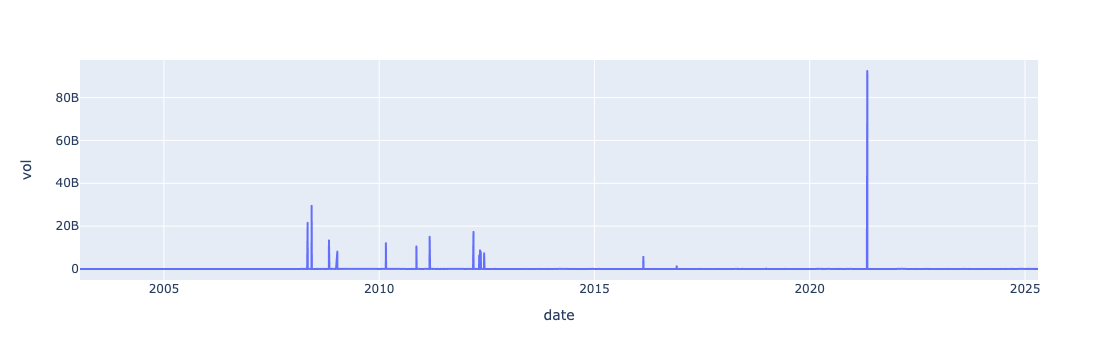

In [15]:
px.line(df, x='date', y='vol')

In [16]:
df = df[df['date'] >= '2013-03-01'].copy()
df

ticker per       date  time     open     high      low    close  \
2517  IMOEX   D 2013-03-01     0  1484.26  1484.26  1466.84  1476.99   
2518  IMOEX   D 2013-03-04     0  1471.17  1476.11  1461.49  1466.13   
2519  IMOEX   D 2013-03-05     0  1469.59  1486.73  1469.02  1486.42   
2520  IMOEX   D 2013-03-06     0  1487.08  1498.02  1486.41  1493.39   
2521  IMOEX   D 2013-03-07     0  1490.98  1498.29  1489.02  1492.75   
...     ...  ..        ...   ...      ...      ...      ...      ...   
5561  IMOEX   D 2025-04-15     0  2824.64  2836.00  2788.26  2805.55   
5562  IMOEX   D 2025-04-16     0  2801.01  2870.39  2790.70  2861.83   
5563  IMOEX   D 2025-04-17     0  2863.20  2884.76  2844.33  2865.32   
5564  IMOEX   D 2025-04-18     0  2881.79  2892.01  2825.41  2872.77   
5565  IMOEX   D 2025-04-21     0  2881.23  2929.91  2880.01  2914.87   

               vol  
2517  1.741176e+07  
2518  1.533419e+07  
2519  1.800426e+07  
2520  1.517083e+07  
2521  1.093711e+07  
...            ...  
5561  1.882500e+07  
5562  2.206011e+07  
5563  2.209345e+07  
5564  2.532206e+07  
5565  2.151547e+07  

[3049 rows x 9 columns]

In [17]:
df.describe()

date    time         open         high  \
count                           3049  3049.0  3049.000000  3049.000000   
mean   2019-03-27 11:30:57.264676608     0.0  2399.704336  2416.451446   
min              2013-03-01 00:00:00     0.0  1236.400000  1240.690000   
25%              2016-03-16 00:00:00     0.0  1853.350000  1863.950000   
50%              2019-03-21 00:00:00     0.0  2301.520000  2320.380000   
75%              2022-04-20 00:00:00     0.0  2908.550000  2931.480000   
max              2025-04-21 00:00:00     0.0  4284.910000  4292.680000   
std                              NaN     0.0   712.134327   714.534563   

               low        close           vol  
count  3049.000000  3049.000000  3.049000e+03  
mean   2380.075044  2399.096487  5.311941e+07  
min    1182.890000  1237.430000  0.000000e+00  
25%    1836.070000  1856.770000  1.432177e+07  
50%    2286.230000  2303.320000  1.855229e+07  
75%    2884.940000  2911.570000  2.431817e+07  
max    4265.940000  4287.520000  9.239947e+10  
std     706.981059   710.695323  1.676269e+09

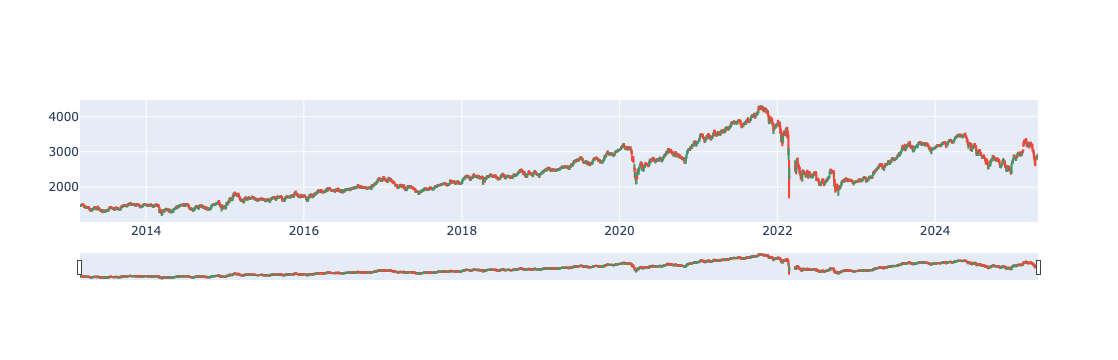

In [18]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

In [1]:
fig = px.line(aggs_df, x='date', y=['close'])

# Добавляем вторую линию с правой осью Y
fig.add_scatter(
    x=aggs_df['x'], 
    y=df['brent_close'], 
    name='Brent, $',
    line=dict(color='red'),
    yaxis='y2'  # указываем, что используем вторую ось Y
)

# Настраиваем оси
fig.update_layout(
    yaxis2=dict(
        title='Вторая ось Y',
        overlaying='y',  # накладываем на первую ось
        side='right',    # размещаем справа
    )
)

NameError: name 'px' is not defined

In [20]:
df.sort_values('date', inplace=True)
df['target'] = df['close'].shift(-1)

In [21]:
df['binar_target'] = df['target'] > df['close']

In [22]:
df['binar_target'].mean()

0.5254181698917678

## Наивные прогнозы

In [23]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['close'])

(-1.8322783109991498,
 0.36455820655048576,
 29,
 3019,
 {'1%': -3.4325178929560756,
  '5%': -2.8624978359868205,
  '10%': -2.5672798809011406},
 30393.656013192915)

In [24]:
df['is_raised'] = df['close'].diff() > 0 
df['is_raised']

2517    False
2518    False
2519     True
2520     True
2521    False
        ...  
5561    False
5562     True
5563     True
5564     True
5565     True
Name: is_raised, Length: 3049, dtype: bool

In [1688]:
from sklearn.metrics import roc_auc_score as roc_auc, mean_absolute_percentage_error as mape, r2_score, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
records = []
#1. Вчера = сегодня 
result_dict = {'method': 'yesterday=today', 'MAPE (regr)': None, 'accuracy (class)': None, 'ROC-AUC (class)': None}
result_dict['accuracy (class)'] = accuracy_score(df['binar_target'].dropna().astype(int), df['binar_target'].dropna().shift(1).fillna(0).astype(int))
result_dict['ROC-AUC (class)'] = roc_auc(df['binar_target'].dropna().astype(int), df['binar_target'].dropna().shift(1).fillna(0).astype(int))
result_dict['MAPE (regr)'] = mape(df['target'].dropna(), df['target'].dropna().shift(1).fillna(0)) * 100
records.append(result_dict)

#2. SMA(7d)

def moving_average(series, window=7):
    return series.rolling(window=window).mean()[window::]

window = 7
    
result_dict = {'method': 'SMA(7d)', 'MAPE (regr)': None, 'accuracy (class)': None, 'ROC-AUC (class)': None}
result_dict['accuracy (class)'] = accuracy_score(df['binar_target'].dropna().astype(int)[window::], moving_average(df.dropna(subset='binar_target')['is_raised'], window) > 0.5)
result_dict['ROC-AUC (class)'] = roc_auc(df['binar_target'].dropna().astype(int)[window::], moving_average(df.dropna(subset='binar_target')['is_raised'], window))
result_dict['MAPE (regr)'] = mape(df['target'].dropna()[window::], moving_average(df.dropna(subset='target')['close'], window)) * 100
records.append(result_dict)

#3. SMA (14d)
window = 14


result_dict = {'method': 'SMA(14d)', 'MAPE (regr)': None, 'accuracy (class)': None, 'ROC-AUC (class)': None}
result_dict['accuracy (class)'] = accuracy_score(df['binar_target'].dropna().astype(int)[window::], moving_average(df.dropna(subset='binar_target')['is_raised'], window) > 0.5)
result_dict['ROC-AUC (class)'] = roc_auc(df['binar_target'].dropna().astype(int)[window::], moving_average(df.dropna(subset='binar_target')['is_raised'], window))
result_dict['MAPE (regr)'] = mape(df['target'].dropna()[window::], moving_average(df.dropna(subset='target')['close'], window)) * 100
records.append(result_dict)

result_dict = {'method': 'ARIMA', 'MAPE (regr)': None, 'accuracy (class)': None, 'ROC-AUC (class)': None}
mod = ARIMA(np.log1p(df['close']), order=(3, 1, 3))
res = mod.fit()
result_dict['MAPE (regr)'] = mape(df['close'].dropna(), np.expm1(res.forecasts[0])) * 100
df['prediction'] = np.expm1(res.forecasts[0])
df['binary_prediction'] = df['prediction'].shift(-1) > df['close'] 
result_dict['accuracy (class)'] = accuracy_score(df['binar_target'].dropna().astype(int), df['binary_prediction'])
records.append(result_dict)

naive_df = pd.DataFrame.from_records(records)
naive_df

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



method  MAPE (regr)  accuracy (class)  ROC-AUC (class)
0  yesterday=today     0.933500          0.526402         0.525175
1          SMA(7d)     1.649224          0.518738         0.516032
2         SMA(14d)     2.271349          0.503789         0.504205
3            ARIMA     0.937614          0.498196              NaN

In [28]:
import itertools
p_range = range(1, 5)  # AR от 0 до 2
q_range = range(1, 5)  # MA от 0 до 2
best_aic = float('inf')
best_order = None

for p, q in itertools.product(p_range, q_range):
    model = ARIMA(np.log1p(df['close']), order=(p, 1, q))  # d=1 (дифференцирование)
    results = model.fit()
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = (p, 1, q)

print(f"Лучшая модель ARIMA{best_order} с AIC={best_aic}")

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/admoskalenko/

Лучшая модель ARIMA(3, 1, 3) с AIC=-16917.37664229315


In [30]:
np.array(mape_scores).mean()

NameError: name 'mape_scores' is not defined

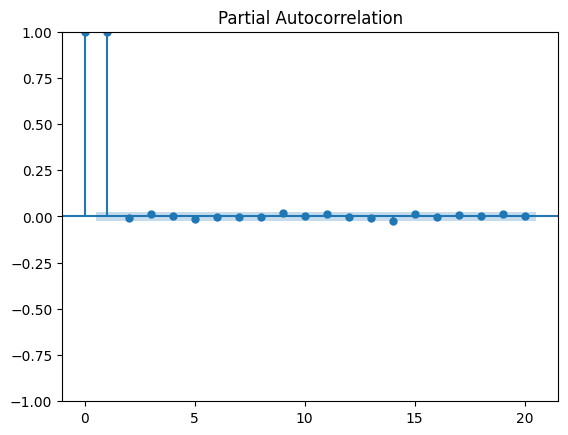

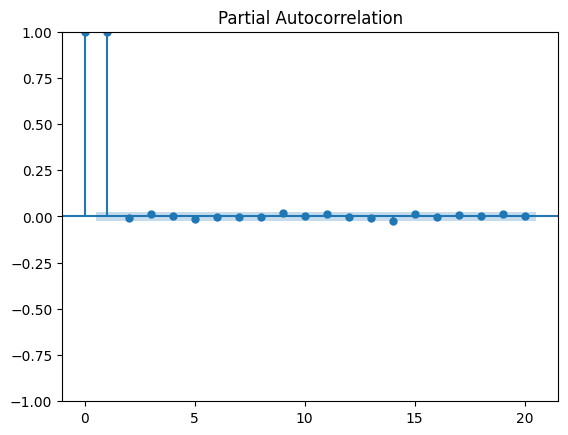

In [332]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(np.log1p(df['close']), lags=20)

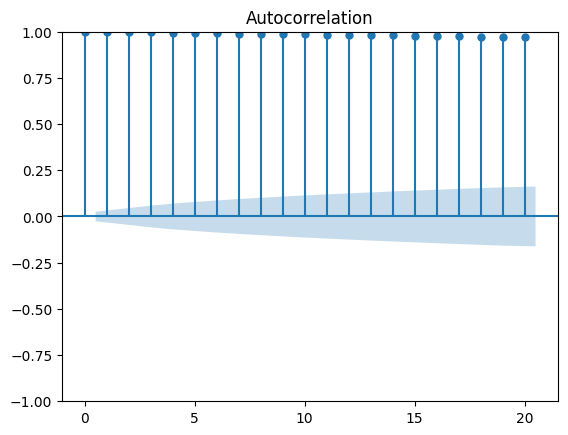

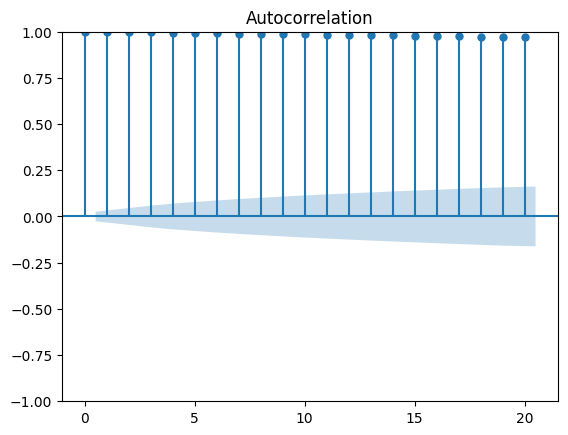

In [328]:
plot_acf(np.log1p(df['close']), lags=20)

In [389]:
naive_df

method  MAPE (regr)  accuracy (class)  ROC-AUC (class)
0  yesterday=today     1.197576          0.507914              NaN
1          SMA(7d)     2.088851          0.532325         0.486589
2         SMA(14d)     2.883995          0.532276         0.486446
3            ARIMA     1.196532          0.517446              NaN

## Прогноз на техническом анализе

In [809]:
!pip3 install ta

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [31]:
import ta

In [32]:
df['return_1d'] = df['close'].pct_change(1)
df['return_7d'] = df['close'].pct_change(7)
df['close_1d'] = df['close'].shift(1)
df['close_7d'] = df['close'].shift(7)

In [33]:
df['sma_7d'] = ta.trend.SMAIndicator(df['close'], window=7).sma_indicator()
df['sma_14d'] = ta.trend.SMAIndicator(df['close'], window=14).sma_indicator()

In [34]:
df['ema_7'] = ta.trend.EMAIndicator(df['close'], window=7).ema_indicator()
df['ema_14'] = ta.trend.EMAIndicator(df['close'], window=14).ema_indicator()

In [35]:
macd = ta.trend.MACD(df['close'])
df['macd'] = macd.macd()
df['macd_Signal'] = macd.macd_signal()
df['macd_Hist'] = macd.macd_diff()  # Гистограмма разницы

In [36]:
df['atr_14'] = ta.volatility.AverageTrueRange(df['high'], df['low'], df['close'], window=14).average_true_range()
df['atr_14']

2517     0.000000
2518     0.000000
2519     0.000000
2520     0.000000
2521     0.000000
          ...    
5561    80.594751
5562    80.530126
5563    77.665832
5564    76.875415
5565    75.465743
Name: atr_14, Length: 3049, dtype: float64

In [37]:
bb = ta.volatility.BollingerBands(df['close'], window=20)
df['bb_upper'] = bb.bollinger_hband()
df['bb_middle'] = bb.bollinger_mavg()
df['bb_lower'] = bb.bollinger_lband()

In [38]:
df['rsi_14'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

In [39]:
df['rsi_14']

2517          NaN
2518          NaN
2519          NaN
2520          NaN
2521          NaN
          ...    
5561    37.263665
5562    42.812885
5563    43.148707
5564    43.905964
5565    48.112065
Name: rsi_14, Length: 3049, dtype: float64

In [40]:
stoch = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14)
df['stoch_k'] = stoch.stoch()
df['stoch_d'] = stoch.stoch_signal()  # Signal line (SMA от %K)

In [41]:
df['obv'] = ta.volume.OnBalanceVolumeIndicator(df['close'], df['vol']).on_balance_volume()

In [42]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
prepared_df = df.dropna()
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    
    # Обучение logreg-a
    
    model = LogisticRegression(max_iter=1000)
    scaler = StandardScaler()
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_train_normed = scaler.fit_transform(X_train)
    model.fit(X_train_normed, y_train)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    X_test_normed = scaler.transform(X_test)
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test_normed)
    # Расчет метрик
    acc = accuracy_score(y_true, predictions)
    accuracy_list.append(acc)
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    roc_auc_list.append(roc)

print('roc-auc:', roc_auc_list)
print('accuracy:', accuracy_list)

0it [00:00, ?it/s]/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

5it [00:00, 49.28it/s]/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/sklearn/bas

roc-auc: [0.5384615384615384, 0.49563086104006815, 0.5, 0.5, 0.5, 0.5, 0.5038172043010752, 0.5, 0.5, 0.5]
accuracy: [0.4781021897810219, 0.5036496350364964, 0.5255474452554745, 0.4708029197080292, 0.5, 0.5401459854014599, 0.4489051094890511, 0.5145985401459854, 0.48175182481751827, 0.5036496350364964]


In [43]:
model.fit(df.dropna().drop(columns=columns_to_drop, axis=1), df.dropna()['binar_target'].astype(int))

LogisticRegression(max_iter=1000)

In [44]:
accuracy_score(df.dropna()['binar_target'].astype(int), model.predict(df.dropna().drop(columns=columns_to_drop, axis=1)))

0.5296849087893865

In [45]:
y_true.shape

(274,)

In [46]:
np.array(accuracy_list).mean()?

SyntaxError: invalid syntax (1687563346.py, line 1)

In [47]:
np.array(roc_auc_list).mean()

0.5037909603802682

In [48]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per']

tscv = TimeSeriesSplit(n_splits=5)
mape_scores = []
roc_auc_list = []
accuracy_list = []
prepared_df = df.dropna()
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = GradientBoostingClassifier()
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    model.fit(X_train, y_train)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc = accuracy_score(y_true, predictions)
    accuracy_list.append(acc)
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    roc_auc_list.append(roc)

print('roc-auc:', roc_auc_list)
print('accuracy:', accuracy_list)

5it [00:04,  1.23it/s]

roc-auc: [0.5364700084259392, 0.5225555502308269, 0.5217112024665982, 0.5011201677868344, 0.5626757960043075]
accuracy: [0.5179282868525896, 0.4820717131474104, 0.5119521912350598, 0.5, 0.47808764940239046]


In [61]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
accuracy_train_list = []
class_share = []
prepared_df = df.dropna()
params = {'depth': 2,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.1,
 'rsm': 0.2,
 'early_stopping_rounds': 50,
 'max_leaves': 2,
 'random_strength': 1}

for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))

10it [00:00, 21.52it/s]

roc-auc val mean: 0.5241520782691692
accuracy val mean: 0.5302919708029197
accuracy test mean: 0.5416288139763819
random: 0.5302919708029197


In [50]:
model.predict(X_train), tra

NameError: name 'tra' is not defined

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.54      0.09      0.15       223
           1       0.56      0.94      0.71       279

    accuracy                           0.56       502
   macro avg       0.55      0.51      0.43       502
weighted avg       0.55      0.56      0.46       502



In [52]:
predictions.mean()

0.9302788844621513

In [53]:
accuracy_score(y_true, model.predict_proba(X_test)[::, 1] > 0.7)

0.4442231075697211

In [54]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = df.dropna()
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    for train_index, test_index in tscv.split(prepared_df):
        train_data = prepared_df.iloc[train_index]
        test_data = prepared_df.iloc[test_index]
        # Обучение logreg-a
        X_train = train_data.drop(columns=columns_to_drop, axis=1)
        y_train = train_data['binar_target'].astype(int)
        X_test = test_data.drop(columns=columns_to_drop, axis=1)
        y_true = test_data['binar_target'].astype(int)
        model.fit(X_train, y_train, eval_set=(X_test, y_true))
        # Прогноз на тестовой выборке
        predictions = model.predict(X_test)
        # Расчет метрик
        acc_val = accuracy_score(y_true, predictions)
        acc_train = accuracy_score(y_train, model.predict(X_train))
        accuracy_list.append(acc_val)
        roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
        accuracy_train_list.append(acc_train)
        roc_auc_list.append(roc)
    
    return np.mean(accuracy_list)

In [55]:
!pip3 install optuna

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [56]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1,)

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

[I 2025-04-21 17:41:57,810] A new study created in memory with name: no-name-5047455c-104b-478f-bc47-3f9dce707a97
[I 2025-04-21 17:41:58,242] Trial 7 finished with value: 0.5251824817518249 and parameters: {'depth': 1, 'learning_rate': 0.05381512620009693, 'l2_leaf_reg': 1.3272438041890853, 'rsm': 0.2, 'early_stopping_rounds': 10, 'max_leaves': 1, 'random_strength': 5.794907069970486}. Best is trial 7 with value: 0.5251824817518249.
[I 2025-04-21 17:41:58,411] Trial 3 finished with value: 0.5251824817518249 and parameters: {'depth': 2, 'learning_rate': 0.016445622141973225, 'l2_leaf_reg': 5.389670761603744, 'rsm': 0.2, 'early_stopping_rounds': 10, 'max_leaves': 1, 'random_strength': 4.452193720821872}. Best is trial 7 with value: 0.5251824817518249.
[I 2025-04-21 17:41

In [57]:
study.best_params

{'depth': 3,
 'learning_rate': 0.08843682520892693,
 'l2_leaf_reg': 5.686431955888796,
 'rsm': 0.2,
 'early_stopping_rounds': 180,
 'max_leaves': 5,
 'random_strength': 2.9053527936746417}

In [71]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
yet = []
class_share = []
accuracy_train_list = []
prepared_df = df.dropna()
params = study.best_params

for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

10it [00:02,  4.63it/s]

roc-auc val mean: 0.5515364263100991
accuracy val mean: 0.5532846715328468
accuracy test mean: 0.5918163221342854
random: 0.5302919708029197
yet: 0.5304029304029303


In [68]:
y_true[1:]

5292    1
5293    1
5294    1
5295    1
5296    1
       ..
5560    0
5561    1
5562    1
5563    1
5564    1
Name: binar_target, Length: 273, dtype: int64

In [69]:
y_true[:-1]

5291    1
5292    1
5293    1
5294    1
5295    1
       ..
5559    0
5560    0
5561    1
5562    1
5563    1
Name: binar_target, Length: 273, dtype: int64

In [65]:
prepared_df['is_raised']

2550    False
2551     True
2552    False
2553     True
2554     True
        ...  
5560    False
5561    False
5562     True
5563     True
5564     True
Name: is_raised, Length: 3015, dtype: bool

In [72]:
cbr_url = 'https://www.cbr.ru/Queries/UniDbQuery/DownloadExcel/132934?Posted=True&From=04.10.2013&To=11.04.2025&FromDate=10%2F04%2F2024&ToDate=04%2F11%2F2025'

In [73]:
import requests
def parser_cbr(yf, mf, df, yt, mt, dt):
    url = f'https://export.finam.ru/export9.out?apply=0&p=8&e=.csv&dtf=1&tmf=1&MSOR=0&mstimever=on&sep=3&sep2=1&datf=1&at=1&from={df}.{mf}.{yf}&to={dt}.{mt}.{yt}&em=420450&code=IMOEX&f=IMOEX_150412_200411&cn=IMOEX&market=undefined&yf={yf}&yt={yt}&df={df}&dt={dt}&mf={mf}&mt={mt}'
    response = requests.get(url, stream=True)
    if response.status_code==200:
        with open(f'raw_data/{yf}-{yt}.csv', 'wb') as f:
                f.write(response.content)
    return response.status_code

In [74]:
response = requests.get(cbr_url, stream=True)
if response.status_code==200:
    with open(f'raw_data/cbr.excel', 'wb') as f:
            f.write(response.content)

In [75]:
response.status_code

200

In [76]:
pd.read_excel('raw_data/cbr.excel')

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



Дата  Ключевая ставка, % годовых  Инфляция, % г/г  Цель по инфляции
0   3.2025                          21            10.34                 4
1   2.2025                          21            10.06                 4
2   1.2025                          21             9.92                 4
3  12.2024                          21             9.52                 4
4  11.2024                          21             8.88                 4
5  10.2024                          21             8.54                 4

In [77]:
import requests
def parser_cbr(yf, mf, df, yt, mt, dt):
    url = f'https://www.cbr.ru/Queries/UniDbQuery/DownloadExcel/132934?Posted=True&FromDate={mf}%2F{df}%2F{yf}&ToDate={mt}%2F{dt}%2F{yt}'    
    response = requests.get(url, stream=True)
    if response.status_code==200:
        with open(f'raw_data/cbr{yf}-{yt}.excel', 'wb') as f:
                f.write(response.content)
    return response.status_code

In [1907]:
import requests
from io import BytesIO

def parser_cbr(yf, mf, df, yt, mt, dt):
    url = f'https://www.cbr.ru/Queries/UniDbQuery/DownloadExcel/132934?Posted=True&FromDate={mf}%2F{df}%2F{yf}&ToDate={mt}%2F{dt}%2F{yt}'    
    response = requests.get(url, stream=True)
    if response.status_code==200:
        csv_data = BytesIO(response.content)
        cbr_df = pd.read_excel(csv_data, dtype={'Дата': 'str'})
        cbr_df['Дата'] = cbr_df['Дата'].apply(lambda x: pd.to_datetime(str(x), format='%m.%Y'))
        cbr_df.rename(
            {'Дата': 'date', 
             'Ключевая ставка, % годовых': 'key_rate', 
             'Инфляция, % г/г': 'cpi', 
             'Цель по инфляции': 'cpi_target'}, 
            axis=1,
            inplace=True)
        cbr_df.sort_values('date', inplace=True)
    return cbr_df

In [1908]:
parser_cbr(2005, '01', '01', 2025, '05', '01')

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



date  key_rate    cpi  cpi_target
146 2013-01-01       NaN   7.07         NaN
145 2013-02-01       NaN   7.28         NaN
144 2013-03-01       NaN   7.02         NaN
143 2013-04-01       NaN   7.24         NaN
142 2013-05-01       NaN   7.39         NaN
..         ...       ...    ...         ...
4   2024-11-01      21.0   8.88         4.0
3   2024-12-01      21.0   9.52         4.0
2   2025-01-01      21.0   9.92         4.0
1   2025-02-01      21.0  10.06         4.0
0   2025-03-01      21.0  10.34         4.0

[147 rows x 4 columns]

In [79]:
cbr_df = pd.read_excel('raw_data/cbr2005-2025.excel', dtype={'Дата': 'str'})
cbr_df['Дата'] = cbr_df['Дата'].apply(lambda x: pd.to_datetime(str(x), format='%m.%Y'))
cbr_df.rename(
    {'Дата': 'date', 
     'Ключевая ставка, % годовых': 'key_rate', 
     'Инфляция, % г/г': 'cpi', 
     'Цель по инфляции': 'cpi_target'}, 
    axis=1,
    inplace=True)
cbr_df.sort_values('date', inplace=True)

/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [80]:
cbr_df

date  key_rate    cpi  cpi_target
146 2013-01-01       NaN   7.07         NaN
145 2013-02-01       NaN   7.28         NaN
144 2013-03-01       NaN   7.02         NaN
143 2013-04-01       NaN   7.24         NaN
142 2013-05-01       NaN   7.39         NaN
..         ...       ...    ...         ...
4   2024-11-01      21.0   8.88         4.0
3   2024-12-01      21.0   9.52         4.0
2   2025-01-01      21.0   9.92         4.0
1   2025-02-01      21.0  10.06         4.0
0   2025-03-01      21.0  10.34         4.0

[147 rows x 4 columns]

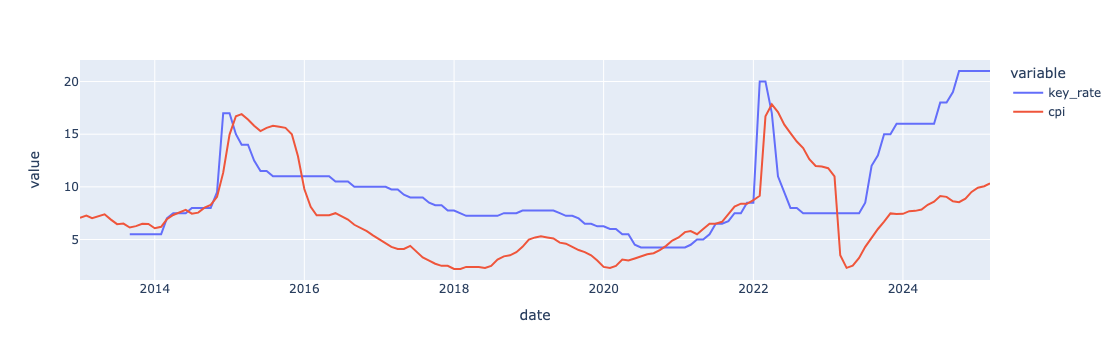

In [81]:
px.line(cbr_df, x='date', y=['key_rate', 'cpi'])

In [84]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate', 'cpi']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

10it [00:02,  4.53it/s]

roc-auc val mean: 0.5496664618416308
accuracy val mean: 0.5347169811320753
accuracy test mean: 0.5733922716475052
random: 0.530188679245283
yet: 0.5295454545454545


In [85]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=20)
mape_scores = []
roc_auc_list = []
accuracy_list = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

20it [00:04,  4.64it/s]

roc-auc val mean: 0.5443693898458878
accuracy val mean: 0.5359712230215826
accuracy test mean: 0.5779672948562486
random: 0.531294964028777
yet: 0.5307971014492754


In [86]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'cpi']

tscv = TimeSeriesSplit(n_splits=20)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

20it [00:04,  4.79it/s]

roc-auc val mean: 0.5397593502169029
accuracy val mean: 0.5366906474820144
accuracy test mean: 0.5657634596876036
random: 0.531294964028777
yet: 0.5307971014492754


In [87]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per']

tscv = TimeSeriesSplit(n_splits=20)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

20it [00:04,  4.72it/s]

roc-auc val mean: 0.555964117755493
accuracy val mean: 0.5348920863309353
accuracy test mean: 0.5808990990512342
random: 0.531294964028777
yet: 0.5307971014492754


In [709]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=5)
mape_scores = []
roc_auc_list = []
accuracy_list = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = LogisticRegression()
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train)
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_list.append(acc_val)
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('accuracy test mean', prepared_df['binar_target'].mean())

5it [00:00, 74.95it/s]

roc-auc val mean: 0.49784267600572185
accuracy val mean: 0.5257731958762888
accuracy test mean: 0.518873096015658
accuracy test mean 0.5283018867924528


In [714]:
pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()

ticker per       date  time     open     high      low    close  \
2644  IMOEX   D 2013-09-02     0  1373.12  1373.33  1366.35  1368.52   
2645  IMOEX   D 2013-09-03     0  1368.52  1384.13  1367.73  1371.99   
2646  IMOEX   D 2013-09-04     0  1371.99  1375.95  1365.23  1373.62   
2647  IMOEX   D 2013-09-05     0  1373.62  1423.47  1373.62  1421.50   
2648  IMOEX   D 2013-09-06     0  1421.50  1448.68  1418.83  1421.45   
...     ...  ..        ...   ...      ...      ...      ...      ...   
5554  IMOEX   D 2025-04-04     0  2886.61  2902.62  2778.43  2781.97   
5555  IMOEX   D 2025-04-07     0  2648.09  2791.28  2646.70  2729.89   
5556  IMOEX   D 2025-04-08     0  2775.78  2780.46  2727.98  2746.41   
5557  IMOEX   D 2025-04-09     0  2689.77  2707.15  2598.85  2650.69   
5558  IMOEX   D 2025-04-10     0  2790.31  2801.19  2742.48  2764.28   

               vol   target  ...    stoch_k    stoch_d           obv  \
2644  7.260675e+06  1371.99  ...  18.481086  18.582154  6.174586e+10   
2645  1.721887e+07  1373.62  ...  24.606776  18.607495  6.176308e+10   
2646  1.341634e+07  1421.50  ...  37.206402  26.764754  6.177649e+10   
2647  2.865636e+07  1421.45  ...  97.092251  52.968476  6.180515e+10   
2648  3.822270e+07  1451.61  ...  70.707831  68.335495  6.176693e+10   
...            ...      ...  ...        ...        ...           ...   
5554  4.604883e+07  2729.89  ...   0.705657   1.468028  5.859045e+10   
5555  6.108421e+07  2746.41  ...  14.009768   5.360188  5.852936e+10   
5556  2.689768e+07  2650.69  ...  16.791849  10.502425  5.855626e+10   
5557  4.676310e+07  2764.28  ...   8.121064  12.974227  5.850950e+10   
5558  3.274152e+07  2829.92  ...  27.399506  17.437473  5.854224e+10   

      is_raised  return_1d  return_7d  close_1d  close_7d  key_rate    cpi  
2644       True   0.002917  -0.020057   1364.54   1396.53       5.5   6.14  
2645       True   0.002536  -0.016565   1368.52   1395.10       5.5   6.14  
2646       True   0.001188  -0.009382   1371.99   1386.63       5.5   6.14  
2647       True   0.034857   0.036064   1373.62   1372.02       5.5   6.14  
2648      False  -0.000035   0.037570   1421.50   1369.98       5.5   6.14  
...         ...        ...        ...       ...       ...       ...    ...  
5554      False  -0.027140  -0.115799   2859.58   3146.31      21.0  10.34  
5555      False  -0.018721  -0.114819   2781.97   3083.99      21.0  10.34  
5556       True   0.006052  -0.092291   2729.89   3025.65      21.0  10.34  
5557      False  -0.034853  -0.120354   2746.41   3013.36      21.0  10.34  
5558       True   0.042853  -0.067517   2650.69   2964.43      21.0  10.34  

[2915 rows x 32 columns]

In [93]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    for train_index, test_index in tscv.split(prepared_df):
        train_data = prepared_df.iloc[train_index]
        test_data = prepared_df.iloc[test_index]
        # Обучение logreg-a
        X_train = train_data.drop(columns=columns_to_drop, axis=1)
        y_train = train_data['binar_target'].astype(int)
        X_test = test_data.drop(columns=columns_to_drop, axis=1)
        y_true = test_data['binar_target'].astype(int)
        model.fit(X_train, y_train, eval_set=(X_test, y_true))
        # Прогноз на тестовой выборке
        predictions = model.predict(X_test)
        # Расчет метрик
        acc_val = accuracy_score(y_true, predictions)
        acc_train = accuracy_score(y_train, model.predict(X_train))
        accuracy_list.append(acc_val)
        roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
        accuracy_train_list.append(acc_train)
        roc_auc_list.append(roc)
    
    return np.mean(accuracy_list)

In [94]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1,)

[I 2025-04-21 18:01:56,485] A new study created in memory with name: no-name-3fd55413-b369-49c8-87fc-fe307e96f03c
[I 2025-04-21 18:01:57,145] Trial 2 finished with value: 0.530566037735849 and parameters: {'depth': 2, 'learning_rate': 0.033624965178835994, 'l2_leaf_reg': 3.7629023807736988, 'rsm': 0.2, 'early_stopping_rounds': 30, 'max_leaves': 2, 'random_strength': 0.7239181313304798}. Best is trial 2 with value: 0.530566037735849.
[I 2025-04-21 18:01:57,319] Trial 4 finished with value: 0.5362264150943397 and parameters: {'depth': 2, 'learning_rate': 0.04166119602490782, 'l2_leaf_reg': 4.233049786077193, 'rsm': 0.2, 'early_stopping_rounds': 40, 'max_leaves': 3, 'random_strength': 3.966585761466769}. Best is trial 4 with value: 0.5362264150943397.
[I 2025-04-21 18:01:57,548] Trial 5 finished with value: 0.5271698113207546 and parameters: {'depth': 4, 'learning_rate': 0.01856280107317933, 'l2_leaf_reg': 6.917177886941803, 'rsm': 0.2, 'early_stopping_rounds': 30, 'max_leaves': 5, 'rando

In [96]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

10it [00:01,  5.04it/s]

roc-auc val mean: 0.5487775672502722
accuracy val mean: 0.5513207547169812
accuracy test mean: 0.5637951643098533
random: 0.530188679245283
yet: 0.5295454545454545


In [97]:
study.best_params

{'depth': 4,
 'learning_rate': 0.08016759406569635,
 'l2_leaf_reg': 5.658162304136253,
 'rsm': 0.5,
 'early_stopping_rounds': 140,
 'max_leaves': 4,
 'random_strength': 6.368742695410815}

In [1910]:
response = requests.get('https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=02/03/2001&date_req2=14/05/2025&VAL_NM_RQ=R01235', stream=True)
if response.status_code==200:
    xml_data = StringIO(response.text)
    xml_data
    usdrub.rename({'Date': 'date', 'Value': 'usdrub'}, axis=1, inplace=True)
    usdrub.drop(['Id', 'Nominal', 'VunitRate'], inplace=True, axis=1)
    usdrub['value'] = usdrub['value'].str.replace(',', '.').astype(float)
    usdrub['date'] = usdrub['date'].apply(pd.to_datetime, dayfirst=True)

In [1911]:
usdrub

Date      Id  Nominal    Value VunitRate
0     02.03.2001  R01235        1  28,6200     28,62
1     03.03.2001  R01235        1  28,6500     28,65
2     06.03.2001  R01235        1  28,6600     28,66
3     07.03.2001  R01235        1  28,6300     28,63
4     08.03.2001  R01235        1  28,6200     28,62
...          ...     ...      ...      ...       ...
5991  06.05.2025  R01235        1  81,9137   81,9137
5992  07.05.2025  R01235        1  80,9644   80,9644
5993  08.05.2025  R01235        1  80,8612   80,8612
5994  13.05.2025  R01235        1  80,8883   80,8883
5995  14.05.2025  R01235        1  80,5500     80,55

[5996 rows x 5 columns]

In [99]:
usdrub = pd.read_xml(xml_data)

usdrub.rename({'Date': 'date', 'Value': 'value'}, axis=1, inplace=True)
usdrub.drop(['Id', 'Nominal', 'VunitRate'], inplace=True, axis=1)
usdrub['value'] = usdrub['value'].str.replace(',', '.').astype(float)
usdrub['date'] = usdrub['date'].apply(pd.to_datetime, dayfirst=True)

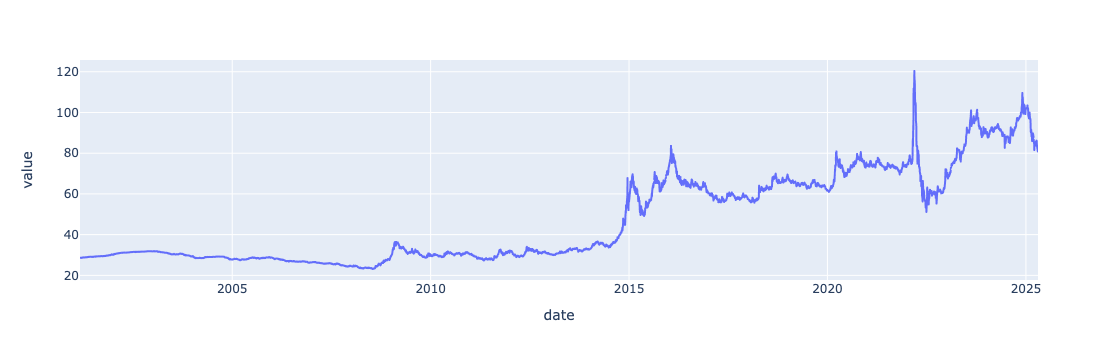

In [100]:
px.line(data_frame=usdrub, x='date', y='value')

In [101]:
usdrub

date    value
0    2001-03-02  28.6200
1    2001-03-03  28.6500
2    2001-03-06  28.6600
3    2001-03-07  28.6300
4    2001-03-08  28.6200
...         ...      ...
5979 2025-04-16  82.3003
5980 2025-04-17  82.5892
5981 2025-04-18  82.0200
5982 2025-04-19  81.1371
5983 2025-04-22  80.7597

[5984 rows x 2 columns]

In [102]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
params = study.best_params

for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_list.append(acc_val)
    class_share.append(y_true.mean())
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random', np.mean(class_share))

10it [00:02,  4.55it/s]

roc-auc val mean: 0.5465171591190756
accuracy val mean: 0.5290566037735849
accuracy test mean: 0.5711498444575143
random 0.530188679245283


In [103]:
prepared_df.drop(columns_to_drop, axis=1).corr()

time      open      high       low     close       vol  \
time          NaN       NaN       NaN       NaN       NaN       NaN   
open          NaN  1.000000  0.999607  0.999005  0.998951  0.029279   
high          NaN  0.999607  1.000000  0.998796  0.999331  0.029770   
low           NaN  0.999005  0.998796  1.000000  0.999562  0.029878   
close         NaN  0.998951  0.999331  0.999562  1.000000  0.029839   
vol           NaN  0.029279  0.029770  0.029878  0.029839  1.000000   
is_raised     NaN  0.022928  0.033392  0.038284  0.048020  0.016027   
return_1d     NaN -0.024167 -0.009807  0.007237  0.015331  0.010993   
return_7d     NaN  0.027957  0.027548  0.046398  0.044078 -0.004394   
close_1d      NaN  0.999659  0.999323  0.998411  0.998507  0.028974   
close_7d      NaN  0.990582  0.991273  0.988103  0.989176  0.030614   
sma_7d        NaN  0.998085  0.998331  0.996578  0.997224  0.030119   
sma_14d       NaN  0.994636  0.995344  0.992529  0.993609  0.030080   
ema_7         NaN  0.998682  0.998964  0.997447  0.998073  0.029903   
ema_14        NaN  0.996382  0.996993  0.994518  0.995497  0.029869   
macd          NaN  0.131803  0.123641  0.143785  0.135264  0.006765   
macd_Signal   NaN  0.144538  0.137122  0.153502  0.145843  0.009031   
macd_Hist     NaN -0.013663 -0.017675 -0.001694 -0.006141 -0.005806   
atr_14        NaN  0.320308  0.331720  0.302310  0.315560  0.006198   
bb_upper      NaN  0.977712  0.980010  0.973579  0.976335  0.027789   
bb_middle     NaN  0.991900  0.992881  0.989524  0.990858  0.029587   
bb_lower      NaN  0.990029  0.989568  0.989594  0.989367  0.031019   
rsi_14        NaN  0.138580  0.137743  0.153088  0.151301  0.001537   
stoch_k       NaN  0.074759  0.077764  0.087760  0.090674 -0.004300   
stoch_d       NaN  0.092664  0.091215  0.100801  0.099258 -0.006327   
obv           NaN  0.533969  0.536175  0.528587  0.532199  0.024988   
cpi           NaN -0.233550 -0.230094 -0.239809 -0.235983 -0.005574   
value         NaN  0.688466  0.691024  0.686276  0.688722  0.010223   

             is_raised  return_1d  return_7d  close_1d  ...    atr_14  \
time               NaN        NaN        NaN       NaN  ...       NaN   
open          0.022928  -0.024167   0.027957  0.999659  ...  0.320308   
high          0.033392  -0.009807   0.027548  0.999323  ...  0.331720   
low           0.038284   0.007237   0.046398  0.998411  ...  0.302310   
close         0.048020   0.015331   0.044078  0.998507  ...  0.315560   
vol           0.016027   0.010993  -0.004394  0.028974  ...  0.006198   
is_raised     1.000000   0.611197   0.245734  0.016694  ... -0.025065   
return_1d     0.611197   1.000000   0.366557 -0.037566  ... -0.046848   
return_7d     0.245734   0.366557   1.000000  0.023521  ... -0.230181   
close_1d      0.016694  -0.037566   0.023521  1.000000  ...  0.319749   
close_7d      0.014452  -0.037031  -0.097883  0.990862  ...  0.358946   
sma_7d        0.020587  -0.028570  -0.016381  0.998322  ...  0.332867   
sma_14d       0.018299  -0.030848  -0.056466  0.994895  ...  0.357464   
ema_7         0.024169  -0.022821  -0.008248  0.998825  ...  0.333771   
ema_14        0.020345  -0.027918  -0.037322  0.996594  ...  0.356066   
macd          0.043257   0.044919   0.417249  0.131490  ... -0.603681   
macd_Signal   0.009943  -0.003769   0.196723  0.145029  ... -0.590183   
macd_Hist     0.114162   0.163146   0.782160 -0.016272  ... -0.164704   
atr_14       -0.025065  -0.046848  -0.230181  0.319749  ...  1.000000   
bb_upper      0.015823  -0.031668  -0.084781  0.977851  ...  0.472562   
bb_middle     0.017873  -0.030498  -0.064879  0.992147  ...  0.376993   
bb_lower      0.019779  -0.028704  -0.042236  0.990388  ...  0.267132   
rsi_14        0.290277   0.296218   0.672065  0.135200  ... -0.286389   
stoch_k       0.393007   0.365500   0.695981  0.071597  ... -0.114629   
stoch_d       0.153300   0.142379   0.670833  0.091435  ... -0.131587   
obv           0.012185  -0.018189  -0.053582  0.533240 

In [104]:
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge(prepared_df, usdrub, on='date', how='left')

In [105]:
prepared_df[prepared_df['value'].isna()]

ticker per       date  time     open     high      low    close  \
0     IMOEX   D 2013-09-02     0  1373.12  1373.33  1366.35  1368.52   
5     IMOEX   D 2013-09-09     0  1421.45  1455.28  1421.45  1451.61   
10    IMOEX   D 2013-09-16     0  1440.93  1474.02  1440.93  1471.99   
15    IMOEX   D 2013-09-23     0  1477.85  1478.59  1463.65  1467.95   
20    IMOEX   D 2013-09-30     0  1472.49  1472.49  1453.77  1463.13   
...     ...  ..        ...   ...      ...      ...      ...      ...   
2896  IMOEX   D 2025-03-17     0  3249.15  3257.33  3213.42  3245.19   
2901  IMOEX   D 2025-03-24     0  3201.66  3202.62  3171.13  3178.66   
2906  IMOEX   D 2025-03-31     0  3008.60  3031.60  2970.94  3013.36   
2911  IMOEX   D 2025-04-07     0  2648.09  2791.28  2646.70  2729.89   
2916  IMOEX   D 2025-04-14     0  2848.99  2856.63  2806.95  2819.69   

               vol   target  ...     bb_upper  bb_middle     bb_lower  \
0     7.260675e+06  1371.99  ...  1412.565908  1381.7365  1350.907092   
5     3.198839e+07  1453.31  ...  1436.168140  1390.6495  1345.130860   
10    3.029885e+07  1470.11  ...  1476.414438  1404.8025  1333.190562   
15    1.794735e+07  1465.78  ...  1515.268447  1426.7915  1338.314553   
20    1.774625e+07  1472.25  ...  1516.170342  1452.5600  1388.949658   
...            ...      ...  ...          ...        ...          ...   
2896  2.731450e+07  3257.49  ...  3337.407018  3230.8670  3124.326982   
2901  1.834221e+07  3164.62  ...  3306.309645  3214.4545  3122.599355   
2906  2.571281e+07  2964.43  ...  3313.486126  3177.1010  3040.715874   
2911  6.108421e+07  2746.41  ...  3395.845540  3086.1820  2776.518460   
2916  1.998655e+07  2805.55  ...  3362.971507  2979.3935  2595.815493   

         rsi_14    stoch_k    stoch_d           obv  key_rate    cpi  value  
0     44.543107  18.481086  18.582154 -1.964995e+08       5.5   6.14    NaN  
5     70.587009  96.313781  88.037954 -1.434423e+08       5.5   6.14    NaN  
10    71.345765  98.284024  88.340457 -9.805229e+07       5.5   6.14    NaN  
15    64.640730  75.479462  82.117226 -9.326039e+07       5.5   6.14    NaN  
20    58.082219  42.640433  59.092764 -1.121514e+08       5.5   6.14    NaN  
...         ...        ...        ...           ...       ...    ...    ...  
2896  57.744177  60.635053  34.545018  8.935159e+10      21.0  10.34    NaN  
2901  50.139401  43.165468  53.678584  8.928001e+10      21.0  10.34    NaN  
2906  34.895243  13.721494   8.748965  8.915309e+10      21.0  10.34    NaN  
2911  19.900538  14.009768   5.360188  8.896112e+10      21.0  10.34    NaN  
2916  38.126792  36.735033  34.190418  8.898136e+10      21.0  10.34    NaN  

[672 rows x 36 columns]

In [107]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    for train_index, test_index in tscv.split(prepared_df):
        train_data = prepared_df.iloc[train_index]
        test_data = prepared_df.iloc[test_index]
        # Обучение logreg-a
        X_train = train_data.drop(columns=columns_to_drop, axis=1)
        y_train = train_data['binar_target'].astype(int)
        X_test = test_data.drop(columns=columns_to_drop, axis=1)
        y_true = test_data['binar_target'].astype(int)
        model.fit(X_train, y_train, eval_set=(X_test, y_true))
        # Прогноз на тестовой выборке
        predictions = model.predict(X_test)
        # Расчет метрик
        acc_val = accuracy_score(y_true, predictions)
        acc_train = accuracy_score(y_train, model.predict(X_train))
        accuracy_list.append(acc_val)
        roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
        accuracy_train_list.append(acc_train)
        roc_auc_list.append(roc)
    
    return np.mean(accuracy_list)

In [108]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1,)

[I 2025-04-21 18:07:03,191] A new study created in memory with name: no-name-95d22097-5944-42f0-8688-25ee27ae75de
[I 2025-04-21 18:07:03,752] Trial 1 finished with value: 0.530188679245283 and parameters: {'depth': 4, 'learning_rate': 0.09172798751093626, 'l2_leaf_reg': 7.036869795639099, 'rsm': 0.8, 'early_stopping_rounds': 20, 'max_leaves': 1, 'random_strength': 5.770206559209341}. Best is trial 1 with value: 0.530188679245283.
[I 2025-04-21 18:07:03,796] Trial 4 finished with value: 0.530188679245283 and parameters: {'depth': 4, 'learning_rate': 0.06985691707664345, 'l2_leaf_reg': 7.635435575935721, 'rsm': 0.8, 'early_stopping_rounds': 20, 'max_leaves': 1, 'random_strength': 9.410110488079162}. Best is trial 1 with value: 0.530188679245283.
[I 2025-04-21 18:07:03,968] Trial 0 finished with value: 0.5252830188679246 and parameters: {'depth': 1, 'learning_rate': 0.02128269528677922, 'l2_leaf_reg': 7.281089688403546, 'rsm': 1, 'early_stopping_rounds': 30, 'max_leaves': 5, 'random_stren

In [1680]:
study.best_params

ValueError: No trials are completed yet.

In [110]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
params = study.best_params

yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

10it [00:01,  9.20it/s]

roc-auc val mean: 0.537286749733767
accuracy val mean: 0.5513207547169812
accuracy test mean: 0.5516883447625764
random: 0.530188679245283
yet: 0.5295454545454545


In [115]:
import requests
def parser(yf, mf, df, yt, mt, dt):
    url = f'https://export.finam.ru/export9.out?apply=0&p=8&e=.csv&dtf=1&tmf=1&MSOR=0&mstimever=on&sep=3&sep2=1&datf=1&at=1&from={df}.{mf}.{yf}&to={dt}.{mt}.{yt}&em=4185457&code=BZ&f=BZ_150412_200411&cn=BZ&market=undefined&yf={yf}&yt={yt}&df={df}&dt={dt}&mf={mf}&mt={mt}'
    response = requests.get(url, stream=True)
    if response.status_code==200:
        with open(f'raw_data/brent{yf}-{yt}.csv', 'wb') as f:
                f.write(response.content)
    return response.status_code

In [116]:
years = [(2000, 2005), (2005, 2010), (2010, 2015), (2015, 2020), (2020, 2025), (2025, 2030)]

for yf, yt in years:
    code = parser(yf, 0, 2, yt, 0, 1)
    print(code)

200
200
200
200
200
200


In [117]:
pd.read_csv('raw_data/brent2000-2005.csv', delimiter=';')

<TICKER> <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>  <LOW>  <CLOSE>  <VOL>
0          BZ     D  20000103       0   25.08   25.08  24.89    24.89      0
1          BZ     D  20000103       0   25.08   25.08  24.89    24.89      0
2          BZ     D  20000104       0   24.21   24.21  23.62    23.94      0
3          BZ     D  20000105       0   23.94   23.94  23.20    23.20      0
4          BZ     D  20000106       0   23.02   23.44  23.02    23.12      0
...       ...   ...       ...     ...     ...     ...    ...      ...    ...
1823       BZ     D  20041229       0   38.42   39.35  38.13    38.92      0
1824       BZ     D  20041230       0   38.93   40.37  38.93    40.29      0
1825       BZ     D  20041231       0   40.24   40.49  40.08    40.24      0
1826       BZ     D  20050101       0   40.24   40.49  40.08    40.24      0
1827       BZ     D  20050103       0   40.24   40.49  40.08    40.24      0

[1828 rows x 9 columns]

In [125]:
import os 
import re
files = os.listdir('raw_data')
oil_df = pd.concat((pd.read_csv(f'raw_data/{x}', delimiter=';') for x in files if 'brent' in x)).sort_values('<DATE>').reset_index(drop=True)
oil_df = oil_df.rename({col: re.sub(r'\W+', '', col).lower() for col in oil_df.columns}, axis=1)
oil_df['date'] = oil_df['date'].astype(str).apply(pd.to_datetime)
oil_df = oil_df[['date', 'close']].rename({'close': 'brent_close'}, axis=1)

date  brent_close
0    2000-01-03        24.89
1    2000-01-03        24.89
2    2000-01-04        23.94
3    2000-01-05        23.20
4    2000-01-06        23.12
...         ...          ...
7429 2025-04-14        64.82
7430 2025-04-15        64.67
7431 2025-04-16        65.85
7432 2025-04-17        67.96
7433 2025-04-21        66.25

[7434 rows x 2 columns]

In [1724]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
    prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
    prepared_df['day_of_week'] = prepared_df.date.dt.dayofweek
    prepared_df['month'] = prepared_df.date.dt.month
    model = CatBoostClassifier(**params, 
                               verbose=0, 
                               has_time=True, 
                               use_best_model=True, 
                               cat_features=['month', 'day_of_week'])
    for train_index, test_index in tscv.split(prepared_df):
        train_data = prepared_df.iloc[train_index]
        test_data = prepared_df.iloc[test_index]
        # Обучение logreg-a
        X_train = train_data.drop(columns=columns_to_drop, axis=1)
        y_train = train_data['binar_target'].astype(int)
        X_test = test_data.drop(columns=columns_to_drop, axis=1)
        y_true = test_data['binar_target'].astype(int)
        model.fit(X_train, y_train, eval_set=(X_test, y_true))
        # Прогноз на тестовой выборке
        predictions = model.predict(X_test)
        # Расчет метрик
        acc_val = accuracy_score(y_true, predictions)
        acc_train = accuracy_score(y_train, model.predict(X_train))
        accuracy_list.append(acc_val)
        roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
        accuracy_train_list.append(acc_train)
        roc_auc_list.append(roc)
    
    return np.mean(roc_auc_list)

In [1725]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1,)

[I 2025-05-06 20:51:17,014] A new study created in memory with name: no-name-cfd468a2-4019-49a7-9164-db8ad57ac059
[I 2025-05-06 20:51:17,835] Trial 2 finished with value: 0.5178818266259805 and parameters: {'depth': 1, 'learning_rate': 0.04193292735288819, 'l2_leaf_reg': 9.621192648892569, 'rsm': 1, 'early_stopping_rounds': 30, 'random_strength': 6.059320264274837}. Best is trial 2 with value: 0.5178818266259805.
[I 2025-05-06 20:51:18,247] Trial 4 finished with value: 0.5445596432565821 and parameters: {'depth': 4, 'learning_rate': 0.023893562176847447, 'l2_leaf_reg': 8.009629657503885, 'rsm': 0.5, 'early_stopping_rounds': 20, 'random_strength': 1.8915227527069}. Best is trial 4 with value: 0.5445596432565821.
[I 2025-05-06 20:51:18,336] Trial 6 finished with value: 0.5174839659724386 and parameters: {'depth': 1, 'learning_rate': 0.0037961653673216312, 'l2_leaf_reg': 8.053554969387289, 'rsm': 0.5, 'early_stopping_rounds': 20, 'random_strength': 3.3166491754945433}. Best is trial 4 wit

KeyboardInterrupt: 

In [1726]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from tqdm import tqdm
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']

tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
class_share = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
params = study.best_params
prepared_df['day_of_week'] = prepared_df.date.dt.dayofweek
prepared_df['month'] = prepared_df.date.dt.month
yet = []
class_share = []
for train_index, test_index in tqdm(tscv.split(prepared_df)):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    model = CatBoostClassifier(**params, 
                               verbose=0, 
                               has_time=True, 
                               use_best_model=True, 
                               cat_features=['month', 'day_of_week'])
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    class_share.append(y_true.mean())
    accuracy_list.append(acc_val)
    yet.append(accuracy_score(y_true[1:], y_true[:-1]))
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)

print('roc-auc val mean:', np.mean(roc_auc_list))
print('accuracy val mean:', np.mean(accuracy_list))
print('accuracy test mean:', np.mean(accuracy_train_list))
print('random:', np.mean(class_share))
print('yet:', np.mean(yet))

10it [00:05,  1.87it/s]

roc-auc val mean: 0.5641203492114718
accuracy val mean: 0.5305660377358491
accuracy test mean: 0.6042170824172001
random: 0.530188679245283
yet: 0.5295454545454545


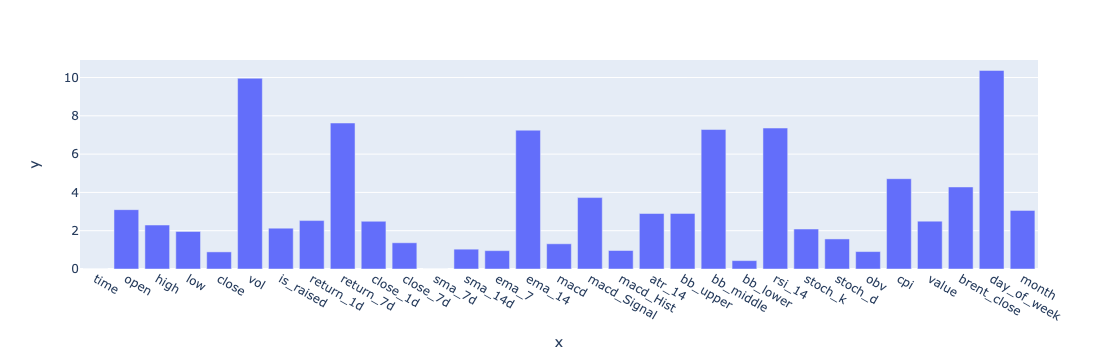

In [1727]:
px.bar(x=model.feature_names_, y=model.feature_importances_, )

In [1719]:
study.best_params

{'depth': 4,
 'learning_rate': 0.0503814989093344,
 'l2_leaf_reg': 2.4278622119972044,
 'rsm': 1,
 'early_stopping_rounds': 110,
 'max_leaves': 10,
 'random_strength': 3.4651202620826886}

## Нейронные сети

In [348]:
!pip3 install torch

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [865]:
df_for_nn = prepared_df[['date', 'open', 'close', 'high', 'cpi', 'vol', 'value', 'brent_close', 'binar_target']].copy()

In [866]:
features = ['open', 'close', 'high', 'cpi', 'value', 'brent_close', 'vol']

In [867]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

In [868]:
df_for_nn

date      open     close      high       cpi       vol     value  \
0    2013-09-02 -0.910304 -0.914042 -0.913080 -0.495841 -0.999843 -0.957476   
1    2013-09-03 -0.913322 -0.911767 -0.906002 -0.495841 -0.999627 -0.957353   
2    2013-09-04 -0.911045 -0.910698 -0.911363 -0.495841 -0.999710 -0.954350   
3    2013-09-05 -0.909976 -0.879302 -0.880222 -0.495841 -0.999380 -0.951880   
4    2013-09-06 -0.878564 -0.879335 -0.863702 -0.495841 -0.999173 -0.953817   
...         ...       ...       ...       ...       ...       ...       ...   
2916 2025-04-14  0.057953  0.037517  0.058942  0.041587 -0.999567  0.344159   
2917 2025-04-15  0.041978  0.028245  0.045423  0.041587 -0.999593  0.312439   
2918 2025-04-16  0.026475  0.065149  0.067959  0.041587 -0.999523  0.300468   
2919 2025-04-17  0.067275  0.067437  0.077376  0.041587 -0.999522  0.307877   
2920 2025-04-18  0.079472  0.072322  0.082127  0.041587 -0.999452  0.293280   

      brent_close  binar_target  
0        0.779778          True  
1        0.803907          True  
2        0.794906          True  
3        0.803907         False  
4        0.811566          True  
...           ...           ...  
2916    -0.132133         False  
2917    -0.135006          True  
2918    -0.112409          True  
2919    -0.072003          True  
2920    -0.072003          True  

[2921 rows x 9 columns]

In [869]:
def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Используем 30 дней истории
X, y = create_sequences(df_for_nn, features, 'binar_target', window_size)

In [1948]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class DatasetCreator:
    def __init__(self, window_size=30, scaler=MinMaxScaler(feature_range=(-1, 1)), train=False):
        self.window_size=window_size
        self.scaler = scaler
        self.train = train

    def __create_sequences(self, data, features, target, date_col='date'):
        X, y = [], []
        if self.train: 
            for i in range(len(data) - self.window_size):
                X.append(data[features].values[i:i+self.window_size])
                y.append(data[target].values[i+self.window_size])
                print(i)
            return np.array(X), np.array(y)
        else:
            for i in range(len(data)-1, self.window_size-2, -1):
                X.append(data[features].values[i-self.window_size+1:i+1])
                y.append(data[date_col].values[i+1])
            return np.array(X), np.array(y)
            
    def create_datasets(self, data, features, target, train_size=0.9):
        if self.train:
            data=data.copy()
            data[features] = scaler.fit_transform(data[features])
            print(data.shape)
            X, y = self.__create_sequences(data, features, target)
            print(X.shape)
            train_size = int(train_size * len(X))
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]

            # Конвертация в тензоры PyTorch
            X_train = torch.FloatTensor(X_train)
            y_train = torch.FloatTensor(y_train).view(-1, 1)
            X_test = torch.FloatTensor(X_test)
            y_test = torch.FloatTensor(y_test).view(-1, 1)
            train_dataset = TimeSeriesDataset(X_train, y_train)
            test_dataset = TimeSeriesDataset(X_test, y_test)              
            return train_dataset, test_dataset
        else:
            data[features] = scaler.transform(data[features])
            X, y = self.__create_sequences(data, features, target)
            X = torch.FloatTensor(X)
            return pd.DataFrame({'date': y, 'tensor': X})



In [1949]:
creator = DatasetCreator(train=True)

train_dataset, test_dataset = creator.create_datasets(prepared_df_w_sentiment, features, 'target')

test_dataset.X

(2921, 40)
0
(1, 30, 4)


tensor([[[-0.9140,  0.7798, -0.4958, -0.9575],
         [-0.9118,  0.8039, -0.4958, -0.9574],
         [-0.9107,  0.7949, -0.4958, -0.9543],
         [-0.8793,  0.8039, -0.4958, -0.9519],
         [-0.8793,  0.8116, -0.4958, -0.9538],
         [-0.8596,  0.7669, -0.4958, -0.9527],
         [-0.8584,  0.7323, -0.4958, -0.9555],
         [-0.8579,  0.7386, -0.4958, -0.9623],
         [-0.8597,  0.7692, -0.4958, -0.9648],
         [-0.8666,  0.7673, -0.4958, -0.9722],
         [-0.8462,  0.7296, -0.4958, -0.9705],
         [-0.8474,  0.6900, -0.4958, -0.9820],
         [-0.8441,  0.7472, -0.4958, -0.9812],
         [-0.8376,  0.7105, -0.4958, -0.9832],
         [-0.8424,  0.7206, -0.4958, -1.0000],
         [-0.8488,  0.6948, -0.4958, -0.9963],
         [-0.8503,  0.7095, -0.4958, -0.9918],
         [-0.8422,  0.6959, -0.4958, -0.9942],
         [-0.8385,  0.7181, -0.4958, -0.9912],
         [-0.8459,  0.7030, -0.4958, -0.9850],
         [-0.8520,  0.6986, -0.4958, -0.9806],
         [-0.

In [1917]:
for i in range(10, -1):
    print(i)

In [870]:
import torch
train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [871]:
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [872]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/exp1/run4dropout')

In [876]:
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.3, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # берём последний шаг
        out = self.fc(out)
        return self.sigmoid(out)

input_size = features.__len__()
model = LSTMBinaryClassifier(input_size, hidden_size=64, num_layers=2)

In [874]:
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [1918]:
torch.__version__

'2.6.0'

In [1921]:
import tensorboard
tensorboard.__version__

'2.19.0'

In [1928]:
FIRST_DATE = datetime(2013, 1, 1).date()
SECOND_DATE = datetime.now().date()



In [1926]:
FIRST_DATE

datetime.datetime(2013, 1, 1, 0, 0)

In [1927]:
SECOND_DATE

datetime.date(2025, 5, 16)

In [875]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/exp1/run28')

def train_classifier(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze(1)
            loss = criterion(outputs, y_batch.squeeze(1).float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = (outputs > 0.5).int()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

        train_acc = accuracy_score(all_labels, all_preds)
        train_f1 = f1_score(all_labels, all_preds)

        # Валидация
        val_acc, val_f1, roc_auc, random, val_loss = evaluate_classifier(model, val_loader, criterion)
        writer.add_scalar('Loss/Train', total_loss/len(train_loader), epoch)
        writer.add_scalar('Loss/Val', val_loss, epoch)
        writer.add_scalar('Acc/Train', train_acc, epoch)
        writer.add_scalar('ROC-AUC/Val', roc_auc, epoch)
        writer.add_scalar('Acc/Val', val_acc, epoch,)
        writer.add_scalar('f1/Val', val_f1, epoch)
        writer.add_scalar('f1/Train', train_f1, epoch)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, "
              f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}, "
              f"val ROC-AUC: {roc_auc:.4f}, Val F1: {val_f1:.4f}, random prediction {random:.4f}")

def evaluate_classifier(model, loader, criterion):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch).squeeze(1)
            preds = (outputs > 0.5).int()
            all_outputs.extend(outputs.cpu().numpy())
            loss = criterion(outputs, y_batch.squeeze(1).float())
            total_loss += loss.item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_outputs)
    return acc, f1, roc_auc, np.mean(all_labels), total_loss/len(loader)

# Обучение
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch 1/500, Loss: 0.6913, Train Acc: 0.5309, Val Acc: 0.5069, Train F1: 0.6936, Val F1: 0.6728, val ROC-AUC: 0.5621, Val F1: 0.6728, random prediction 0.5069
Epoch 2/500, Loss: 0.6913, Train Acc: 0.5298, Val Acc: 0.5069, Train F1: 0.6892, Val F1: 0.6728, val ROC-AUC: 0.5865, Val F1: 0.6728, random prediction 0.5069
Epoch 3/500, Loss: 0.6908, Train Acc: 0.5302, Val Acc: 0.5069, Train F1: 0.6771, Val F1: 0.6728, val ROC-AUC: 0.5918, Val F1: 0.6728, random prediction 0.5069
Epoch 4/500, Loss: 0.6905, Train Acc: 0.5309, Val Acc: 0.5069, Train F1: 0.6936, Val F1: 0.6728, val ROC-AUC: 0.5784, Val F1: 0.6728, random prediction 0.5069
Epoch 5/500, Loss: 0.6906, Train Acc: 0.5271, Val Acc: 0.5069, Train F1: 0.6337, Val F1: 0.6728, val ROC-AUC: 0.5974, Val F1: 0.6728, random prediction 0.5069
Epoch 6/500, Loss: 0.6904, Train Acc: 0.5313, Val Acc: 0.5069, Train F1: 0.6935, Val F1: 0.6728, val ROC-AUC: 0.5798, Val F1: 0.6728, random prediction 0.5069
Epoch 7/500, Loss: 0.6904, Train Acc: 0.5325, 

KeyboardInterrupt: 

In [380]:
%tensorboard --logdir logs/pytorch_experiment

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

Name: tensorboard
Version: 2.19.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/admoskalenko/Library/Python/3.9/lib/python/site-packages
Requires: tensorboard-data-server, six, packaging, numpy, protobuf, werkzeug, setuptools, grpcio, absl-py, markdown
Required-by: 


In [378]:
os.environ


environ{'__CFBundleIdentifier': 'com.apple.Terminal',
        'TMPDIR': '/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/',
        'XPC_FLAGS': '0x0',
        'TERM': 'xterm-color',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.qa0CTvYwP0/Listeners',
        'XPC_SERVICE_NAME': '0',
        'TERM_PROGRAM': 'Apple_Terminal',
        'TERM_PROGRAM_VERSION': '445',
        'TERM_SESSION_ID': '7A1D4132-E2F1-4100-BFCB-FA30BCB705AB',
        'SHELL': '/bin/zsh',
        'HOME': '/Users/admoskalenko',
        'LOGNAME': 'admoskalenko',
        'USER': 'admoskalenko',
        'PATH': '/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/PostgreSQL/16/bin',
        'SHLVL': '1',
        'PWD': '/Users/admoskalenko',
        'OLDPWD': '/Users/admoskalenko',
        'LANG': 'ru_RU.UTF-8',
        '_': '/usr/bin/python3',
        '__CF_USER_TEXT_ENCODING': '0x1F5:0x7:0x31',
        'SDKROOT': '/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk',
        'CPATH': '/usr/local/include'

## на фичах с тех анализом

In [714]:
features = list(prepared_df.drop(columns_to_drop + ['time', 'is_raised', 'return_1d', 'return_7d', 'close_1d', 'close_7d', 'sma_7d', 'sma_14d', 'ema_7', 'bb_middle'], axis=1).columns)
features

['open',
 'high',
 'low',
 'close',
 'vol',
 'ema_14',
 'macd',
 'macd_Signal',
 'macd_Hist',
 'atr_14',
 'bb_upper',
 'bb_lower',
 'rsi_14',
 'stoch_k',
 'stoch_d',
 'obv',
 'cpi',
 'value',
 'brent_close']

In [715]:
df_for_nn = prepared_df[features + ['binar_target']].copy()
df_for_nn

open     high      low    close           vol       ema_14  \
0     1373.12  1373.33  1366.35  1368.52  7.260675e+06  1378.781537   
1     1368.52  1384.13  1367.73  1371.99  1.721887e+07  1377.875999   
2     1371.99  1375.95  1365.23  1373.62  1.341634e+07  1377.308533   
3     1373.62  1423.47  1373.62  1421.50  2.865636e+07  1383.200728   
4     1421.50  1448.68  1418.83  1421.45  3.822270e+07  1388.300631   
...       ...      ...      ...      ...           ...          ...   
2916  2848.99  2856.63  2806.95  2819.69  1.998655e+07  2875.158891   
2917  2824.64  2836.00  2788.26  2805.55  1.882500e+07  2865.877706   
2918  2801.01  2870.39  2790.70  2861.83  2.206011e+07  2865.338012   
2919  2863.20  2884.76  2844.33  2865.32  2.209345e+07  2865.335610   
2920  2881.79  2892.01  2825.41  2872.77  2.532206e+07  2866.326862   

            macd  macd_Signal  macd_Hist     atr_14     bb_upper     bb_lower  \
0      -3.309098    -0.110648  -3.198450  18.651566  1412.565908  1350.907092   
1      -3.519703    -0.792459  -2.727244  18.490740  1412.364767  1351.699233   
2      -3.514567    -1.336881  -2.177686  17.935687  1411.854693  1353.324307   
3       0.348996    -0.999705   1.348701  20.215281  1417.888157  1353.144843   
4       3.368038    -0.126157   3.494195  20.903475  1423.364046  1351.541954   
...          ...          ...        ...        ...          ...          ...   
2916 -105.406231   -86.512064 -18.894167  83.122040  3362.971507  2595.815493   
2917 -101.536463   -89.516944 -12.019519  80.594751  3325.125660  2588.467340   
2918  -92.857910   -90.185137  -2.672773  80.530126  3286.552290  2590.244710   
2919  -84.721859   -89.092481   4.370622  77.665832  3244.209923  2596.805077   
2920  -76.787667   -86.631518   9.843851  76.875415  3203.769661  2605.361339   

         rsi_14    stoch_k    stoch_d           obv    cpi    value  \
0     44.543107  18.481086  18.582154 -1.964995e+08   6.14  33.2474   
1     46.177663  24.606776  18.607495 -1.792807e+08   6.14  33.2522   
2     46.968381  37.206402  26.764754 -1.658643e+08   6.14  33.3693   
3     63.794531  97.092251  52.968476 -1.372080e+08   6.14  33.4656   
4     63.771776  70.707831  68.335495 -1.754307e+08   6.14  33.3901   
...         ...        ...        ...           ...    ...      ...   
2916  38.126792  36.735033  34.190418  8.898136e+10  10.34  84.0040   
2917  37.263665  39.336213  38.169321  8.896253e+10  10.34  82.7671   
2918  42.812885  54.401026  43.490758  8.898459e+10  10.34  82.3003   
2919  43.148707  59.829808  51.189016  8.900669e+10  10.34  82.5892   
2920  43.905964  61.502537  58.577790  8.903201e+10  10.34  82.0200   

      brent_close  binar_target  
0          112.44          True  
1          113.70          True  
2          113.23          True  
3          113.70         False  
4          114.10          True  
...           ...           ...  
2916        64.82         False  
2917        64.67          True  
2918        65.85          True  
2919        67.96          True  
2920        67.96          True  

[2921 rows x 20 columns]

In [716]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

In [726]:
def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)

window_size = 90  # Используем 30 дней истории
X, y = create_sequences(df_for_nn, features, 'binar_target', window_size)

In [770]:
import torch
train_size = int(0.90 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [728]:
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [729]:
from torch.utils.tensorboard import SummaryWriter

In [730]:
import torch
import numpy as np
import random

def set_seed(seed=42):
    """Фиксирует random seed для всех компонентов"""
    # 1. Для Python
    random.seed(seed)
    
    # 2. Для NumPy
    np.random.seed(seed)
    
    # 3. Для PyTorch (CPU и CUDA)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # если используете несколько GPU
    
    # 4. Дополнительные настройки для CUDA
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # 5. Для встроенного Python hash
    import os
    os.environ['PYTHONHASHSEED'] = str(seed)

# Установите seed (например, 42)
set_seed(42)

In [731]:
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.5, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # берём последний шаг
        out = self.fc(out)
        return self.sigmoid(out)

input_size = features.__len__()
model = LSTMBinaryClassifier(input_size, hidden_size=64, num_layers=2)

In [732]:
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [734]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/exp1/run27')

def train_classifier(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze(1)
            loss = criterion(outputs, y_batch.squeeze(1).float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = (outputs > 0.5).int()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

        train_acc = accuracy_score(all_labels, all_preds)
        train_f1 = f1_score(all_labels, all_preds)

        # Валидация
        val_acc, val_f1, roc_auc, random, val_loss = evaluate_classifier(model, val_loader, criterion)
        writer.add_scalar('Loss/Train', total_loss/len(train_loader), epoch)
        writer.add_scalar('Loss/Val', val_loss, epoch)
        writer.add_scalar('Acc/Train', train_acc, epoch)
        writer.add_scalar('ROC-AUC/Val', roc_auc, epoch)
        writer.add_scalar('Acc/Val', val_acc, epoch,)
        writer.add_scalar('f1/Val', val_f1, epoch)
        writer.add_scalar('f1/Train', train_f1, epoch)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, "
              f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}, "
              f"val ROC-AUC: {roc_auc:.4f}, Val F1: {val_f1:.4f}, random prediction {random:.4f}")

def evaluate_classifier(model, loader, criterion):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch).squeeze(1)
            preds = (outputs > 0.5).int()
            all_outputs.extend(outputs.cpu().numpy())
            loss = criterion(outputs, y_batch.squeeze(1).float())
            total_loss += loss.item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_outputs)
    return acc, f1, roc_auc, np.mean(all_labels), total_loss/len(loader)

# Обучение
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch 1/500, Loss: 0.6909, Train Acc: 0.5276, Val Acc: 0.5452, Train F1: 0.6803, Val F1: 0.6880, val ROC-AUC: 0.5377, Val F1: 0.6880, random prediction 0.5480
Epoch 2/500, Loss: 0.6920, Train Acc: 0.5285, Val Acc: 0.5438, Train F1: 0.6799, Val F1: 0.6667, val ROC-AUC: 0.5239, Val F1: 0.6667, random prediction 0.5480
Epoch 3/500, Loss: 0.6915, Train Acc: 0.5252, Val Acc: 0.5466, Train F1: 0.6585, Val F1: 0.6899, val ROC-AUC: 0.5514, Val F1: 0.6899, random prediction 0.5480
Epoch 4/500, Loss: 0.6914, Train Acc: 0.5337, Val Acc: 0.5466, Train F1: 0.6724, Val F1: 0.6589, val ROC-AUC: 0.5300, Val F1: 0.6589, random prediction 0.5480
Epoch 5/500, Loss: 0.6907, Train Acc: 0.5323, Val Acc: 0.5127, Train F1: 0.6673, Val F1: 0.5455, val ROC-AUC: 0.5322, Val F1: 0.5455, random prediction 0.5480
Epoch 6/500, Loss: 0.6905, Train Acc: 0.5299, Val Acc: 0.5523, Train F1: 0.6626, Val F1: 0.6505, val ROC-AUC: 0.5316, Val F1: 0.6505, random prediction 0.5480
Epoch 7/500, Loss: 0.6902, Train Acc: 0.5290, 

KeyboardInterrupt: 

In [ ]:
prepared_df.iloc[int(0.75 * len(prepared_df)):, :]

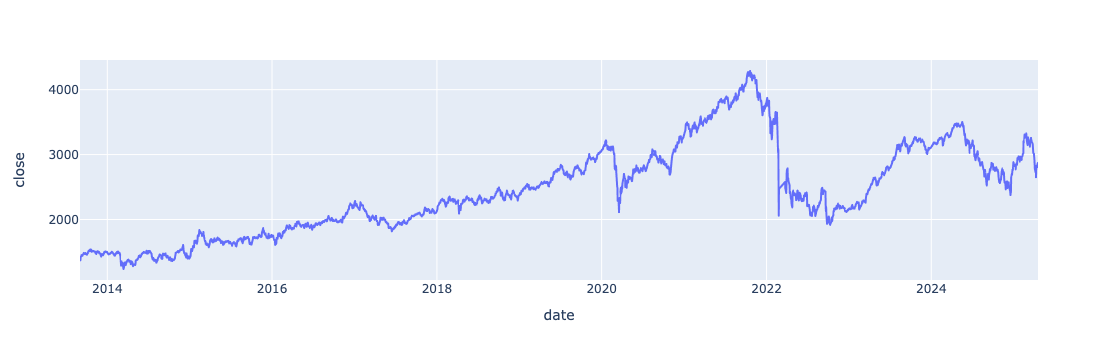

In [576]:
px.line(prepared_df, x='date', y='close')

In [699]:
model.eval()
with torch.no_grad():
    data = ((model(X_test) > 0.5) == y_test).cpu().numpy()
    outputs = model(X_test).cpu().numpy()

In [700]:
data.mean(), y_test.mean()

(0.5516759776536313, tensor(0.5461))

In [688]:
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay

p, r, t = precision_recall_curve(y_test, outputs.squeeze(), )

PrecisionRecallDisplay(p, r)

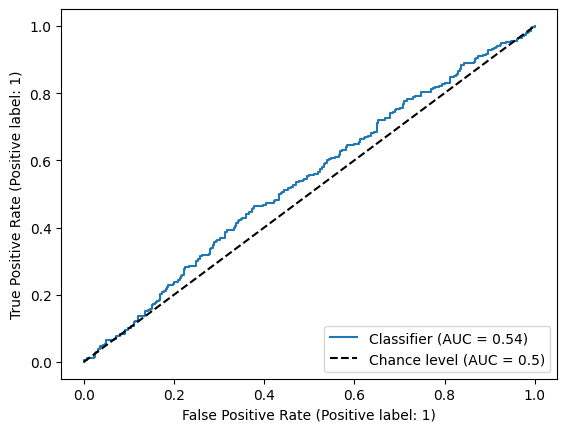

In [691]:
RocCurveDisplay.from_predictions(y_test, outputs.squeeze(), plot_chance_level=True)

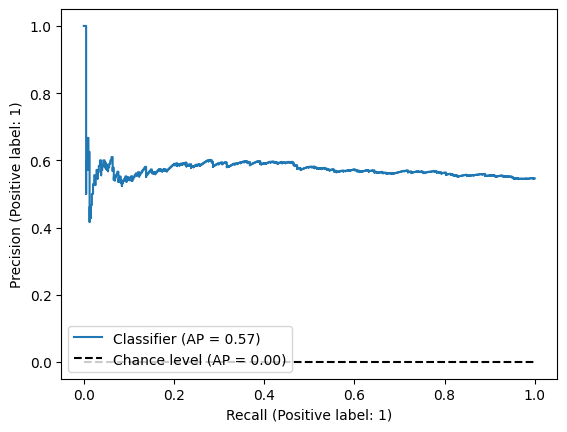

In [692]:
PrecisionRecallDisplay.from_predictions(y_test, outputs.squeeze(), plot_chance_level=True)

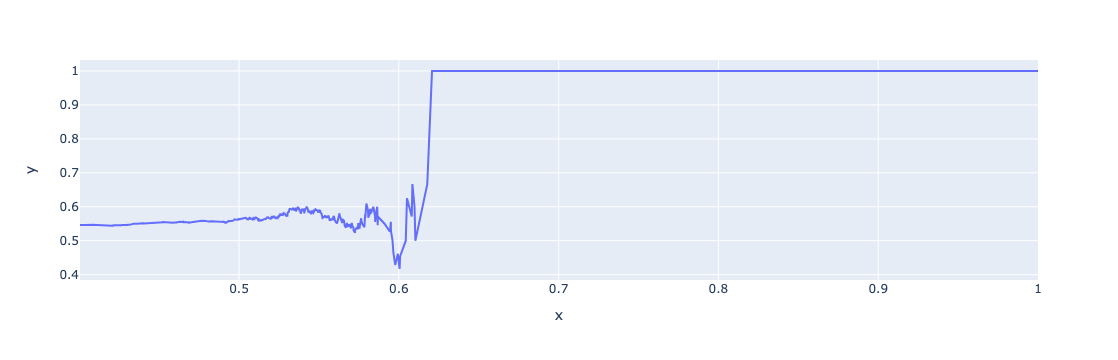

In [696]:
px.line(x=list(t) + [1], y=p)

In [702]:
(outputs > 0.6).sum()

12

In [665]:
roc_curve(y_test, outputs.squeeze(), )

(716, 1)

In [1208]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
    prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
    model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    train_data = prepared_df.iloc[:int(0.8 * len(prepared_df)), :]
    test_data = prepared_df.iloc[int(0.8 * len(prepared_df)):, :]
    # Обучение logreg-a
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['binar_target'].astype(int)
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['binar_target'].astype(int)
    model.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_list.append(acc_val)
    roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)
    
    return np.mean(accuracy_list)

In [1675]:
params = {
    'depth': trial.suggest_int('depth', 1, 5, step=1),
    'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
    'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
    'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
    'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
    'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
    'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
}
columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
roc_auc_list = []
accuracy_list = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
model = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
train_data = prepared_df.iloc[:int(0.8 * len(prepared_df)), :]
test_data = prepared_df.iloc[int(0.8 * len(prepared_df)):, :]
# Обучение logreg-a
X_train = train_data.drop(columns=columns_to_drop, axis=1)
y_train = train_data['binar_target'].astype(int)
X_test = test_data.drop(columns=columns_to_drop, axis=1)
y_true = test_data['binar_target'].astype(int)
model.fit(X_train, y_train, eval_set=(X_test, y_true))
# Прогноз на тестовой выборке
predictions = model.predict(X_test)
# Расчет метрик
acc_val = accuracy_score(y_true, predictions)
acc_train = accuracy_score(y_train, model.predict(X_train))
accuracy_list.append(acc_val)
roc = roc_auc(y_true, model.predict_proba(X_test)[::, 1])
accuracy_train_list.append(acc_train)
roc_auc_list.append(roc)

np.mean(кщс)

0.5536398467432949

In [1666]:
predictions.mean()

0.7401709401709402

In [705]:
prepared_df.iloc[:int(0.75 * len(prepared_df)), :]

ticker per       date  time     open     high      low    close  \
0     IMOEX   D 2013-09-02     0  1373.12  1373.33  1366.35  1368.52   
1     IMOEX   D 2013-09-03     0  1368.52  1384.13  1367.73  1371.99   
2     IMOEX   D 2013-09-04     0  1371.99  1375.95  1365.23  1373.62   
3     IMOEX   D 2013-09-05     0  1373.62  1423.47  1373.62  1421.50   
4     IMOEX   D 2013-09-06     0  1421.50  1448.68  1418.83  1421.45   
...     ...  ..        ...   ...      ...      ...      ...      ...   
2185  IMOEX   D 2022-06-01     0  2349.84  2385.64  2338.90  2374.60   
2186  IMOEX   D 2022-06-02     0  2374.67  2382.23  2337.53  2340.17   
2187  IMOEX   D 2022-06-03     0  2341.55  2348.03  2286.82  2308.03   
2188  IMOEX   D 2022-06-06     0  2308.35  2321.75  2277.21  2282.16   
2189  IMOEX   D 2022-06-07     0  2281.30  2294.40  2239.72  2291.62   

               vol   target  ...  bb_middle     bb_lower     rsi_14  \
0     7.260675e+06  1371.99  ...  1381.7365  1350.907092  44.543107   
1     1.721887e+07  1373.62  ...  1382.0320  1351.699233  46.177663   
2     1.341634e+07  1421.50  ...  1382.5895  1353.324307  46.968381   
3     2.865636e+07  1421.45  ...  1385.5165  1353.144843  63.794531   
4     3.822270e+07  1451.61  ...  1387.4530  1351.541954  63.771776   
...            ...      ...  ...        ...          ...        ...   
2185  9.752559e+06  2340.17  ...  2376.9780  2282.448930  46.583184   
2186  1.103062e+07  2308.03  ...  2371.7280  2281.359692  44.013646   
2187  1.584405e+07  2282.16  ...  2368.4715  2273.945901  41.701219   
2188  1.022878e+07  2291.62  ...  2362.3395  2262.286183  39.884771   
2189  1.087274e+07  2318.85  ...  2357.2690  2253.733043  40.898570   

        stoch_k    stoch_d           obv  key_rate    cpi    value  \
0     18.481086  18.582154 -1.964995e+08       5.5   6.14  33.2474   
1     24.606776  18.607495 -1.792807e+08       5.5   6.14  33.2522   
2     37.206402  26.764754 -1.658643e+08       5.5   6.14  33.3693   
3     97.092251  52.968476 -1.372080e+08       5.5   6.14  33.4656   
4     70.707831  68.335495 -1.754307e+08       5.5   6.14  33.3901   
...         ...        ...           ...       ...    ...      ...   
2185  55.711822  56.598327  8.775467e+10       9.5  15.90  61.6069   
2186  42.517724  48.905921  8.774364e+10       9.5  15.90  61.4733   
2187  30.201188  42.810245  8.772780e+10       9.5  15.90  61.5750   
2188  20.287411  31.002108  8.771757e+10       9.5  15.90  61.9659   
2189  27.658348  26.048983  8.772844e+10       9.5  15.90  61.1094   

      brent_close  
0          112.44  
1          113.70  
2          113.23  
3          113.70  
4          114.10  
...           ...  
2185       115.90  
2186       118.29  
2187       121.08  
2188       119.99  
2189       121.00  

[2190 rows x 37 columns]

## Обучение на гибридных LSTM + Transformer

In [849]:
prepared_df

ticker per       date  time     open     high      low    close  \
0     IMOEX   D 2013-09-02     0  1373.12  1373.33  1366.35  1368.52   
1     IMOEX   D 2013-09-03     0  1368.52  1384.13  1367.73  1371.99   
2     IMOEX   D 2013-09-04     0  1371.99  1375.95  1365.23  1373.62   
3     IMOEX   D 2013-09-05     0  1373.62  1423.47  1373.62  1421.50   
4     IMOEX   D 2013-09-06     0  1421.50  1448.68  1418.83  1421.45   
...     ...  ..        ...   ...      ...      ...      ...      ...   
2916  IMOEX   D 2025-04-14     0  2848.99  2856.63  2806.95  2819.69   
2917  IMOEX   D 2025-04-15     0  2824.64  2836.00  2788.26  2805.55   
2918  IMOEX   D 2025-04-16     0  2801.01  2870.39  2790.70  2861.83   
2919  IMOEX   D 2025-04-17     0  2863.20  2884.76  2844.33  2865.32   
2920  IMOEX   D 2025-04-18     0  2881.79  2892.01  2825.41  2872.77   

               vol   target  ...  bb_middle     bb_lower     rsi_14  \
0     7.260675e+06  1371.99  ...  1381.7365  1350.907092  44.543107   
1     1.721887e+07  1373.62  ...  1382.0320  1351.699233  46.177663   
2     1.341634e+07  1421.50  ...  1382.5895  1353.324307  46.968381   
3     2.865636e+07  1421.45  ...  1385.5165  1353.144843  63.794531   
4     3.822270e+07  1451.61  ...  1387.4530  1351.541954  63.771776   
...            ...      ...  ...        ...          ...        ...   
2916  1.998655e+07  2805.55  ...  2979.3935  2595.815493  38.126792   
2917  1.882500e+07  2861.83  ...  2956.7965  2588.467340  37.263665   
2918  2.206011e+07  2865.32  ...  2938.3985  2590.244710  42.812885   
2919  2.209345e+07  2872.77  ...  2920.5075  2596.805077  43.148707   
2920  2.532206e+07  2914.87  ...  2904.5655  2605.361339  43.905964   

        stoch_k    stoch_d           obv  key_rate    cpi    value  \
0     18.481086  18.582154 -1.964995e+08       5.5   6.14  33.2474   
1     24.606776  18.607495 -1.792807e+08       5.5   6.14  33.2522   
2     37.206402  26.764754 -1.658643e+08       5.5   6.14  33.3693   
3     97.092251  52.968476 -1.372080e+08       5.5   6.14  33.4656   
4     70.707831  68.335495 -1.754307e+08       5.5   6.14  33.3901   
...         ...        ...           ...       ...    ...      ...   
2916  36.735033  34.190418  8.898136e+10      21.0  10.34  84.0040   
2917  39.336213  38.169321  8.896253e+10      21.0  10.34  82.7671   
2918  54.401026  43.490758  8.898459e+10      21.0  10.34  82.3003   
2919  59.829808  51.189016  8.900669e+10      21.0  10.34  82.5892   
2920  61.502537  58.577790  8.903201e+10      21.0  10.34  82.0200   

      brent_close  
0          112.44  
1          113.70  
2          113.23  
3          113.70  
4          114.10  
...           ...  
2916        64.82  
2917        64.67  
2918        65.85  
2919        67.96  
2920        67.96  

[2921 rows x 37 columns]

In [883]:
features

['open',
 'high',
 'low',
 'close',
 'vol',
 'return_1d',
 'return_7d',
 'close_1d',
 'close_7d',
 'sma_7d',
 'sma_14d',
 'ema_7',
 'ema_14',
 'macd',
 'macd_Signal',
 'macd_Hist',
 'atr_14',
 'bb_upper',
 'bb_middle',
 'bb_lower',
 'rsi_14',
 'stoch_k',
 'stoch_d',
 'obv',
 'cpi',
 'value',
 'brent_close']

In [1192]:
df_for_nn = prepared_df.copy()

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size - 1])
    return np.array(X), np.array(y)
    
features = ['close', 'cpi', 'value', 'brent_close', 'open', 'high', 'low', 'vol', 'atr_14']
features
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'binar_target', window_size)


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1193]:
class AttentionLSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_heads, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out, _ = self.attention(out, out, out)  # Механизм внимания
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = features.__len__()
model = AttentionLSTMClassifier(input_size, hidden_size=64, num_layers=2, num_heads=2)

In [1204]:
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            dropout=0.3 if num_layers > 1 else 0,  # Dropout только между слоями
            batch_first=True
        )
        self.dropout = nn.Dropout(0.5)  # Дополнительный dropout
        self.bn = nn.BatchNorm1d(hidden_size)  # BatchNorm
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Linear(hidden_size//2, 1)
        )
        self.sigmoid = nn.Sigmoid()
        
        # Инициализация весов
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_normal_(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)

    def forward(self, x):
        # Инициализация скрытых состояний
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # берём последний шаг
        out = self.bn(out)
        out = self.dropout(out)
        out = self.fc(out)
        return self.sigmoid(out)

input_size = features.__len__()
model = LSTMBinaryClassifier(input_size, hidden_size=32, num_layers=1)

In [1205]:
writer = SummaryWriter('logs/exp1/class7')
model = LSTMBinaryClassifier(input_size, hidden_size=32, num_layers=1)
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch 1/500, Loss: 0.6975, Train Acc: 0.4948, Val Acc: 0.4439, Train F1: 0.4357, Val F1: 0.0000, val ROC-AUC: 0.5472, Val F1: 0.0000, random prediction 0.5561
Epoch 2/500, Loss: 0.6976, Train Acc: 0.5151, Val Acc: 0.5009, Train F1: 0.5768, Val F1: 0.3417, val ROC-AUC: 0.5531, Val F1: 0.3417, random prediction 0.5561
Epoch 3/500, Loss: 0.6973, Train Acc: 0.5048, Val Acc: 0.5147, Train F1: 0.5560, Val F1: 0.3797, val ROC-AUC: 0.5635, Val F1: 0.3797, random prediction 0.5561
Epoch 4/500, Loss: 0.6939, Train Acc: 0.5251, Val Acc: 0.5475, Train F1: 0.5754, Val F1: 0.5957, val ROC-AUC: 0.5637, Val F1: 0.5957, random prediction 0.5561
Epoch 5/500, Loss: 0.6938, Train Acc: 0.5039, Val Acc: 0.5250, Train F1: 0.5686, Val F1: 0.5409, val ROC-AUC: 0.5637, Val F1: 0.5409, random prediction 0.5561
Epoch 6/500, Loss: 0.6903, Train Acc: 0.5346, Val Acc: 0.5596, Train F1: 0.5940, Val F1: 0.6341, val ROC-AUC: 0.5645, Val F1: 0.6341, random prediction 0.5561
Epoch 7/500, Loss: 0.6922, Train Acc: 0.5169, 

KeyboardInterrupt: 

In [1049]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class HybridLSTMTransformer(nn.Module):
    def __init__(self, input_size=10, lstm_hidden=64, num_layers=1, nhead=4, dropout=0.2):
        super().__init__()
        
        # 1. LSTM часть для извлечения временных паттернов
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=lstm_hidden,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.lstm_dropout = nn.Dropout(dropout)
        
        # 2. Transformer часть для анализа глобальных зависимостей
        self.transformer_encoder = TransformerEncoder(
            TransformerEncoderLayer(
                d_model=lstm_hidden,
                nhead=nhead,
                dropout=dropout,
                batch_first=True
            ),
            num_layers=2
        )
        
        # 3. Механизм внимания к ключевым временным точкам
        self.attention = nn.Sequential(
            nn.Linear(lstm_hidden, lstm_hidden // 2),
            nn.Tanh(),
            nn.Linear(lstm_hidden // 2, 1),
            nn.Softmax(dim=1)
        )
        
        # 4. Классификатор
        self.classifier = nn.Sequential(
            nn.Linear(lstm_hidden, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # LSTM обработка
        lstm_out, _ = self.lstm(x)  # [batch, seq_len, lstm_hidden]
        lstm_out = self.lstm_dropout(lstm_out)
        
        # Transformer
        transformer_out = self.transformer_encoder(lstm_out)  # [batch, seq_len, lstm_hidden]
        
        # Внимание
        attention_weights = self.attention(transformer_out)  # [batch, seq_len, 1]
        context = torch.sum(attention_weights * transformer_out, dim=1)  # [batch, lstm_hidden]
        
        # Классификация
        return self.classifier(context)

# Пример использования
model = HybridLSTMTransformer(
    input_size=features.__len__(),  # кол-во признаков (цена, объем, индикаторы...)
    lstm_hidden=64,
    num_layers=1,
    nhead=4,
    dropout=0.3
).to('cuda' if torch.cuda.is_available() else 'cpu')


In [1936]:
train_dataset.X.size()

torch.Size([2601, 30, 4])

In [1050]:
writer = SummaryWriter('logs/exp1/runAttLSTMv43')

criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch 1/500, Loss: 0.7004, Train Acc: 0.5087, Val Acc: 0.5069, Train F1: 0.5885, Val F1: 0.6728, val ROC-AUC: 0.4996, Val F1: 0.6728, random prediction 0.5069
Epoch 2/500, Loss: 0.6918, Train Acc: 0.5148, Val Acc: 0.5069, Train F1: 0.6510, Val F1: 0.6728, val ROC-AUC: 0.5065, Val F1: 0.6728, random prediction 0.5069
Epoch 3/500, Loss: 0.6919, Train Acc: 0.5271, Val Acc: 0.5069, Train F1: 0.6856, Val F1: 0.6728, val ROC-AUC: 0.4843, Val F1: 0.6728, random prediction 0.5069
Epoch 4/500, Loss: 0.6920, Train Acc: 0.5283, Val Acc: 0.5069, Train F1: 0.6904, Val F1: 0.6728, val ROC-AUC: 0.5143, Val F1: 0.6728, random prediction 0.5069
Epoch 5/500, Loss: 0.6911, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.5097, Val F1: 0.6728, random prediction 0.5069
Epoch 6/500, Loss: 0.6914, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.5097, Val F1: 0.6728, random prediction 0.5069
Epoch 7/500, Loss: 0.6918, Train Acc: 0.5306, 

KeyboardInterrupt: 

In [1178]:
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.5, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # берём последний шаг
        out = self.fc(out)
        return self.sigmoid(out)

    def get_embeddings(self, x):
        with torch.no_grad():
            self.eval()
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            return out

input_size = features.__len__()
model = LSTMBinaryClassifier(input_size, hidden_size=64, num_layers=2)

In [1052]:
writer = SummaryWriter('logs/exp1/runAttLSTMv45')

criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=500)

Epoch 1/500, Loss: 0.6915, Train Acc: 0.5152, Val Acc: 0.5069, Train F1: 0.6617, Val F1: 0.6728, val ROC-AUC: 0.5675, Val F1: 0.6728, random prediction 0.5069
Epoch 2/500, Loss: 0.6916, Train Acc: 0.5309, Val Acc: 0.5069, Train F1: 0.6935, Val F1: 0.6728, val ROC-AUC: 0.5757, Val F1: 0.6728, random prediction 0.5069
Epoch 3/500, Loss: 0.6908, Train Acc: 0.5313, Val Acc: 0.5069, Train F1: 0.6926, Val F1: 0.6728, val ROC-AUC: 0.5902, Val F1: 0.6728, random prediction 0.5069
Epoch 4/500, Loss: 0.6905, Train Acc: 0.5286, Val Acc: 0.5069, Train F1: 0.6495, Val F1: 0.6728, val ROC-AUC: 0.5948, Val F1: 0.6728, random prediction 0.5069
Epoch 5/500, Loss: 0.6907, Train Acc: 0.5283, Val Acc: 0.5069, Train F1: 0.6770, Val F1: 0.6728, val ROC-AUC: 0.5924, Val F1: 0.6728, random prediction 0.5069
Epoch 6/500, Loss: 0.6902, Train Acc: 0.5313, Val Acc: 0.5069, Train F1: 0.6796, Val F1: 0.6728, val ROC-AUC: 0.5920, Val F1: 0.6728, random prediction 0.5069
Epoch 7/500, Loss: 0.6907, Train Acc: 0.5333, 

KeyboardInterrupt: 

In [965]:
train = model.get_embeddings(X_train).cpu().numpy()
train_y = y_train.cpu().numpy()

In [966]:
test = model.get_embeddings(X_test).cpu().numpy()
test_y = y_test.cpu().numpy()

In [1678]:
def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    roc_auc_list = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
    prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
    gb = CatBoostClassifier(**params, verbose=0, has_time=True, use_best_model=True, cat_features=['month', 'day_of_week'], grow_policy='Lossguide')
    train_data = train
    test_data = test
    # Обучение logreg-a
    X_train = train_data
    y_train = train_y
    X_test = test_data
    y_true = y_test.cpu().numpy()
    gb.fit(X_train, y_train, eval_set=(X_test, y_true))
    # Прогноз на тестовой выборке
    predictions = gb.predict(X_test)
    # Расчет метрик
    acc_val = accuracy_score(y_true, predictions)
    acc_train = accuracy_score(y_train, gb.predict(X_train))
    accuracy_list.append(acc_val)
    roc = roc_auc(y_true, gb.predict_proba(X_test)[::, 1])
    accuracy_train_list.append(acc_train)
    roc_auc_list.append(roc)
    
    return np.mean(roc_auc_list)

In [1679]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1,)

[I 2025-05-05 22:08:22,583] A new study created in memory with name: no-name-ea017c0a-c0bb-4f86-b409-ff5fb7a109ee
[W 2025-05-05 22:08:22,624] Trial 1 failed with parameters: {'depth': 1, 'learning_rate': 0.061020032355244995, 'l2_leaf_reg': 3.114577529854011, 'rsm': 0.5, 'early_stopping_rounds': 20, 'max_leaves': 1, 'random_strength': 4.366691189208855} because of the following error: CatBoostError("'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features").
Traceback (most recent call last):
  File "/Users/admoskalenko/Library/Python/3.9/lib/python/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/ipykernel_19500/3535347282.py", line 31, in objective
    gb.fit(X_train, y_train, eval_set=(X_test, y_true))
  File "/Users/admoskalenko/Library/Python/3.9/lib/python/site-pac

CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features

## Регрессия

In [977]:
np.log(df['target'] / df['close'])

2517   -0.007380
2518    0.013744
2519    0.004678
2520   -0.000429
2521    0.008791
          ...   
5561    0.019862
5562    0.001219
5563    0.002597
5564    0.014549
5565         NaN
Length: 3049, dtype: float64

In [990]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 1, 5, step=1),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 10),
        'rsm': trial.suggest_categorical('rsm', [0.2, 0.5, 0.8, 1]),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200, step=10),
        'max_leaves': trial.suggest_int('max_leaves', 1, 5, step=1),
        'random_strength': trial.suggest_float('random_strength', 1e-4, 10)
    }
    columns_to_drop = ['target', 'binar_target', 'time', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'key_rate']
    tscv = TimeSeriesSplit(n_splits=10)
    mape_scores = []
    accuracy_list = []
    accuracy_train_list = []
    prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
    prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
    prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
    model = CatBoostRegressor(**params, verbose=0, has_time=True, use_best_model=True, grow_policy='Lossguide')
    for train_index, test_index in tscv.split(prepared_df):
        train_data = prepared_df.iloc[train_index]
        test_data = prepared_df.iloc[test_index]
        # Обучение logreg-a
        X_train = train_data.drop(columns=columns_to_drop, axis=1)
        y_train = np.log(train_data['target'] / train_data['close'])
        X_test = test_data.drop(columns=columns_to_drop, axis=1)
        y_true = np.log(test_data['target'] / test_data['close'])
        model.fit(X_train, y_train, eval_set=(X_test, y_true))
        # Прогноз на тестовой выборке
        predictions = model.predict(X_test)
        # Расчет метрик
        acc_val = mape(y_true, predictions)
        acc_train = mape(y_train, model.predict(X_train))
        accuracy_list.append(acc_val)
        accuracy_train_list.append(acc_train)
    
    return np.mean(accuracy_list)

In [991]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, n_jobs=-1,)

[I 2025-04-24 12:01:56,889] A new study created in memory with name: no-name-c555763f-38b9-4187-baaa-2d680da97a45
[I 2025-04-24 12:01:57,307] Trial 7 finished with value: 2121242538.6496022 and parameters: {'depth': 2, 'learning_rate': 0.08260705825390571, 'l2_leaf_reg': 9.409084819936531, 'rsm': 0.2, 'early_stopping_rounds': 40, 'max_leaves': 1, 'random_strength': 9.738722230325784}. Best is trial 7 with value: 2121242538.6496022.
[I 2025-04-24 12:01:57,565] Trial 0 finished with value: 2121242538.972964 and parameters: {'depth': 2, 'learning_rate': 0.06368263378316959, 'l2_leaf_reg': 8.021740242907105, 'rsm': 0.2, 'early_stopping_rounds': 180, 'max_leaves': 1, 'random_strength': 5.024860630708906}. Best is trial 0 with value: 2121242538.972964.
[I 2025-04-24 12:01:57,873] Trial 3 finished with value: 1732839356.261977 and parameters: {'depth': 4, 'learning_rate': 0.03350013508385178, 'l2_leaf_reg': 2.9323965058410395, 'rsm': 0.8, 'early_stopping_rounds': 20, 'max_leaves': 4, 'random_

KeyboardInterrupt: 

In [1018]:
from sklearn.linear_model import LinearRegression

columns_to_drop = ['target', 'binar_target', 'time', 'prediction', 'binary_prediction', 'date', 'ticker', 'per', 'value', 'key_rate']
tscv = TimeSeriesSplit(n_splits=10)
mape_scores = []
naive = []
accuracy_list = []
accuracy_train_list = []
prepared_df = pd.merge_asof(df, cbr_df[['key_rate', 'cpi', 'date']], on='date').dropna()
prepared_df = pd.merge_asof(prepared_df, usdrub, on='date')
prepared_df = pd.merge_asof(prepared_df, oil_df, on='date')
model = LinearRegression()
for train_index, test_index in tscv.split(prepared_df):
    train_data = prepared_df.iloc[train_index]
    test_data = prepared_df.iloc[test_index]
    # Обучение logreg-a
    X_train = train_data.drop(columns=columns_to_drop, axis=1)
    y_train = train_data['target']
    X_test = test_data.drop(columns=columns_to_drop, axis=1)
    y_true = test_data['target']
    model.fit(X_train, y_train)
    # Прогноз на тестовой выборке
    predictions = model.predict(X_test)
    # Расчет метрик
    acc_val = r2_score(y_true, predictions)
    acc_train = r2_score(y_train, model.predict(X_train))
    accuracy_list.append(acc_val)
    accuracy_train_list.append(acc_train)
    mape_scores.append(mape(y_true, predictions))
    naive.append(r2_score(y_true[1:], y_true[:-1]))

np.mean(accuracy_list), np.mean(mape_scores), np.mean(naive)

(0.9037731122204014, 0.013163749858619228, 0.9617685334544858)

In [1228]:
df_for_nn = prepared_df.copy()

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)
    
features = ['close', 'open', 'high', 'low', 'cpi', 'value', 'brent_close', 'vol']
features
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'close', window_size)


train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1281]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            dropout=0.5 if num_layers > 1 else 0,  # Dropout только между слоями
            batch_first=True
        )
        self.dropout = nn.Dropout(0.5)  # Дополнительный dropout
        self.bn = nn.BatchNorm1d(hidden_size)  # BatchNorm
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 1),
        )
        
        # Инициализация весов
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_normal_(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)

    def forward(self, x):
        # Инициализация скрытых состояний
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # берём последний шаг
        out = self.bn(out)
        out = self.dropout(out)
        out = self.fc(out)
        return out

input_size = features.__len__()
model = LSTMRegressor(input_size, hidden_size=128, num_layers=1)

In [1282]:
writer = SummaryWriter('logs/exp1/reg54')
model = LSTMRegressor(input_size, hidden_size=128, num_layers=1)
criterion = nn.MSELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
train_regressor(model, train_loader, test_loader, criterion, optimizer, epochs=1000)

Epoch 1/1000, Loss: 0.5497, Train MAPE: 9.9026, Val MAPE: 4.1867,Train R2: -5.1978, Val R2: -3.8579,Train MAE: 0.5956, Val MAE: 0.5728, naive mape: 0.3299, naive R2: 0.9921, naive MAE: 0.0191
Epoch 2/1000, Loss: 0.3687, Train MAPE: 7.5327, Val MAPE: 5.4839,Train R2: -3.0652, Val R2: -4.2916,Train MAE: 0.4897, Val MAE: 0.6070, naive mape: 0.3299, naive R2: 0.9921, naive MAE: 0.0191
Epoch 3/1000, Loss: 0.2648, Train MAPE: 5.8339, Val MAPE: 5.4181,Train R2: -2.0466, Val R2: -3.9444,Train MAE: 0.4146, Val MAE: 0.5875, naive mape: 0.3299, naive R2: 0.9921, naive MAE: 0.0191
Epoch 4/1000, Loss: 0.1925, Train MAPE: 5.5321, Val MAPE: 4.4940,Train R2: -1.1341, Val R2: -2.7383,Train MAE: 0.3534, Val MAE: 0.5088, naive mape: 0.3299, naive R2: 0.9921, naive MAE: 0.0191
Epoch 5/1000, Loss: 0.1966, Train MAPE: 6.3722, Val MAPE: 2.5949,Train R2: -0.9446, Val R2: -1.0581,Train MAE: 0.3344, Val MAE: 0.3710, naive mape: 0.3299, naive R2: 0.9921, naive MAE: 0.0191
Epoch 6/1000, Loss: 0.1346, Train MAPE: 

KeyboardInterrupt: 

In [1783]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_absolute_error as mae
from torch.utils.tensorboard import SummaryWriter

def train_regressor(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        all_labels = []
        all_outputs = []

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze(1)
            loss = criterion(outputs, y_batch.squeeze(1).float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            all_labels.extend(y_batch.cpu().numpy())
            all_outputs.extend(outputs.detach().cpu().numpy())

        train_mape = mape(all_labels, all_outputs)
        train_mae = mae(all_labels, all_outputs)
        train_r2 = r2_score(all_labels, all_outputs)

        # Валидация
        val_mape, val_r2, val_mae, naive_mape, naive_r2, naive_mae, val_loss = evaluate_regressor(model, val_loader, criterion)
        writer.add_scalar('Loss/Train', total_loss/len(train_loader), epoch)
        writer.add_scalar('Loss/Val', val_loss, epoch)
        writer.add_scalar('MAPE/Train', train_mape, epoch)
        writer.add_scalar('R2/Val', val_r2, epoch)
        writer.add_scalar('R2/Train', train_r2, epoch)
        writer.add_scalar('MAPE/Val', val_mape, epoch,)
        writer.add_scalar('MAE/Train', train_mae, epoch)
        writer.add_scalar('MAE/Val', val_mae, epoch,)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, "
              f"Train MAPE: {train_mape:.4f}, Val MAPE: {val_mape:.4f},"
              f"Train R2: {train_r2:.4f}, Val R2: {val_r2:.4f},"
              f"Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}, "
              f"naive mape: {naive_mape:.4f}, naive R2: {naive_r2:.4f}, naive MAE: {naive_mae:.4f}")

def evaluate_regressor(model, loader, criterion):
    model.eval()
    total_loss = 0
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch).squeeze(1)
            all_outputs.extend(outputs.cpu().numpy())
            loss = criterion(outputs, y_batch.squeeze(1).float())
            total_loss += loss.item()
            all_labels.extend(y_batch.cpu().numpy())
    
    mape_score = mape(all_labels, all_outputs)
    r2 = r2_score(all_labels, all_outputs)
    mae_score = mae(all_labels, all_outputs)
    return mape_score, r2, mae_score, mape(all_labels[1:], all_labels[:-1]), r2_score(all_labels[1:], all_labels[:-1]), mae(all_labels[1:], all_labels[:-1]), total_loss/len(loader)


In [1267]:
class AttentionLSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_heads, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out, _ = self.attention(out, out, out)  # Механизм внимания
        out = self.fc(out[:, -1, :])
        return out

input_size = features.__len__()
# Пример использования
model = AttentionLSTMRegressor(
    input_size=features.__len__(),  # кол-во признаков (цена, объем, индикаторы...)
    hidden_size=64,
    num_layers=1,
    num_heads=1,
).to('cuda' if torch.cuda.is_available() else 'cpu')

In [1298]:
df_for_nn = prepared_df[prepared_df['date'] <= '2020-01-01'].copy()

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)
    
features = ['close', 'high', 'low', 'vol', 'brent_close', 'value']
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'close', window_size)


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1299]:
returns = df_for_nn['close'].pct_change().abs()
returns.quantile(0.90)

0.17165044989956296

In [1301]:
writer = SummaryWriter('logs/exp1/reg59')
model = AttentionLSTMRegressor(
    input_size=features.__len__(),  # кол-во признаков (цена, объем, индикаторы...)
    hidden_size=64,
    num_layers=1,
    num_heads=1,
).to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_regressor(model, train_loader, test_loader, criterion, optimizer, epochs=1000)

Epoch 1/1000, Loss: 0.1668, Train MAPE: 2.9608, Val MAPE: 1.4542,Train R2: -0.4942, Val R2: -10.1700,Train MAE: 0.3286, Val MAE: 0.7116, naive mape: 0.0420, naive R2: 0.9897, naive MAE: 0.0176
Epoch 2/1000, Loss: 0.0401, Train MAPE: 4.8844, Val MAPE: 0.6833,Train R2: 0.6409, Val R2: -2.2862,Train MAE: 0.1564, Val MAE: 0.3664, naive mape: 0.0420, naive R2: 0.9897, naive MAE: 0.0176
Epoch 3/1000, Loss: 0.0142, Train MAPE: 1.7783, Val MAPE: 0.3638,Train R2: 0.8741, Val R2: -0.2790,Train MAE: 0.1006, Val MAE: 0.2127, naive mape: 0.0420, naive R2: 0.9897, naive MAE: 0.0176
Epoch 4/1000, Loss: 0.0084, Train MAPE: 1.6375, Val MAPE: 0.5093,Train R2: 0.9254, Val R2: -0.9991,Train MAE: 0.0758, Val MAE: 0.2805, naive mape: 0.0420, naive R2: 0.9897, naive MAE: 0.0176
Epoch 5/1000, Loss: 0.0066, Train MAPE: 0.9003, Val MAPE: 0.4571,Train R2: 0.9417, Val R2: -0.6517,Train MAE: 0.0645, Val MAE: 0.2533, naive mape: 0.0420, naive R2: 0.9897, naive MAE: 0.0176
Epoch 6/1000, Loss: 0.0052, Train MAPE: 1.2

In [1399]:
df_for_nn = prepared_df.copy()
df_for_nn['log_return'] = np.log1p(df_for_nn['close'].pct_change(1))
df_for_nn.dropna(inplace=True)

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)
    
features = ['close', 'brent_close', 'cpi', 'value', 'vol']
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'close', window_size)


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1400]:
writer = SummaryWriter('logs/exp1/lstm+att+5ft+1l1h')
model = AttentionLSTMRegressor(
    input_size=features.__len__(),  # кол-во признаков (цена, объем, индикаторы...)
    hidden_size=64,
    num_layers=1,
    num_heads=1,
).to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_regressor(model, train_loader, test_loader, criterion, optimizer, epochs=400)

Epoch 1/400, Loss: 0.1834, Train MAPE: 4.2574, Val MAPE: 2.5922,Train R2: 0.1352, Val R2: -0.0174,Train MAE: 0.3410, Val MAE: 0.1808, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 2/400, Loss: 0.0364, Train MAPE: 1.6263, Val MAPE: 4.6758,Train R2: 0.8289, Val R2: 0.4774,Train MAE: 0.1475, Val MAE: 0.1328, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 3/400, Loss: 0.0098, Train MAPE: 1.3471, Val MAPE: 3.4250,Train R2: 0.9522, Val R2: 0.6855,Train MAE: 0.0676, Val MAE: 0.0991, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 4/400, Loss: 0.0071, Train MAPE: 1.2410, Val MAPE: 3.0676,Train R2: 0.9669, Val R2: 0.7117,Train MAE: 0.0555, Val MAE: 0.0929, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 5/400, Loss: 0.0084, Train MAPE: 1.2214, Val MAPE: 1.5023,Train R2: 0.9692, Val R2: 0.8657,Train MAE: 0.0511, Val MAE: 0.0633, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 6/400, Loss: 0.0067, Train MAPE: 1.2557, Val MAP

In [1401]:
writer = SummaryWriter('logs/exp1/lstm+5ft+1l')
LSTMRegressor(features.__len__(), hidden_size=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_regressor(model, train_loader, test_loader, criterion, optimizer, epochs=400)

Epoch 1/400, Loss: 0.0023, Train MAPE: 0.4498, Val MAPE: 1.7180,Train R2: 0.9889, Val R2: 0.7907,Train MAE: 0.0368, Val MAE: 0.0807, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 2/400, Loss: 0.0008, Train MAPE: 0.3059, Val MAPE: 1.2800,Train R2: 0.9962, Val R2: 0.8242,Train MAE: 0.0192, Val MAE: 0.0730, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 3/400, Loss: 0.0006, Train MAPE: 0.2185, Val MAPE: 1.1003,Train R2: 0.9970, Val R2: 0.8408,Train MAE: 0.0152, Val MAE: 0.0694, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 4/400, Loss: 0.0006, Train MAPE: 0.2074, Val MAPE: 1.3539,Train R2: 0.9971, Val R2: 0.8008,Train MAE: 0.0145, Val MAE: 0.0784, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 5/400, Loss: 0.0006, Train MAPE: 0.2506, Val MAPE: 1.0132,Train R2: 0.9973, Val R2: 0.8443,Train MAE: 0.0146, Val MAE: 0.0679, naive mape: 0.6052, naive R2: 0.9895, naive MAE: 0.0159
Epoch 6/400, Loss: 0.0005, Train MAPE: 0.2192, Val MAPE

KeyboardInterrupt: 

In [1330]:
scaler.inverse_transform(sca)

578

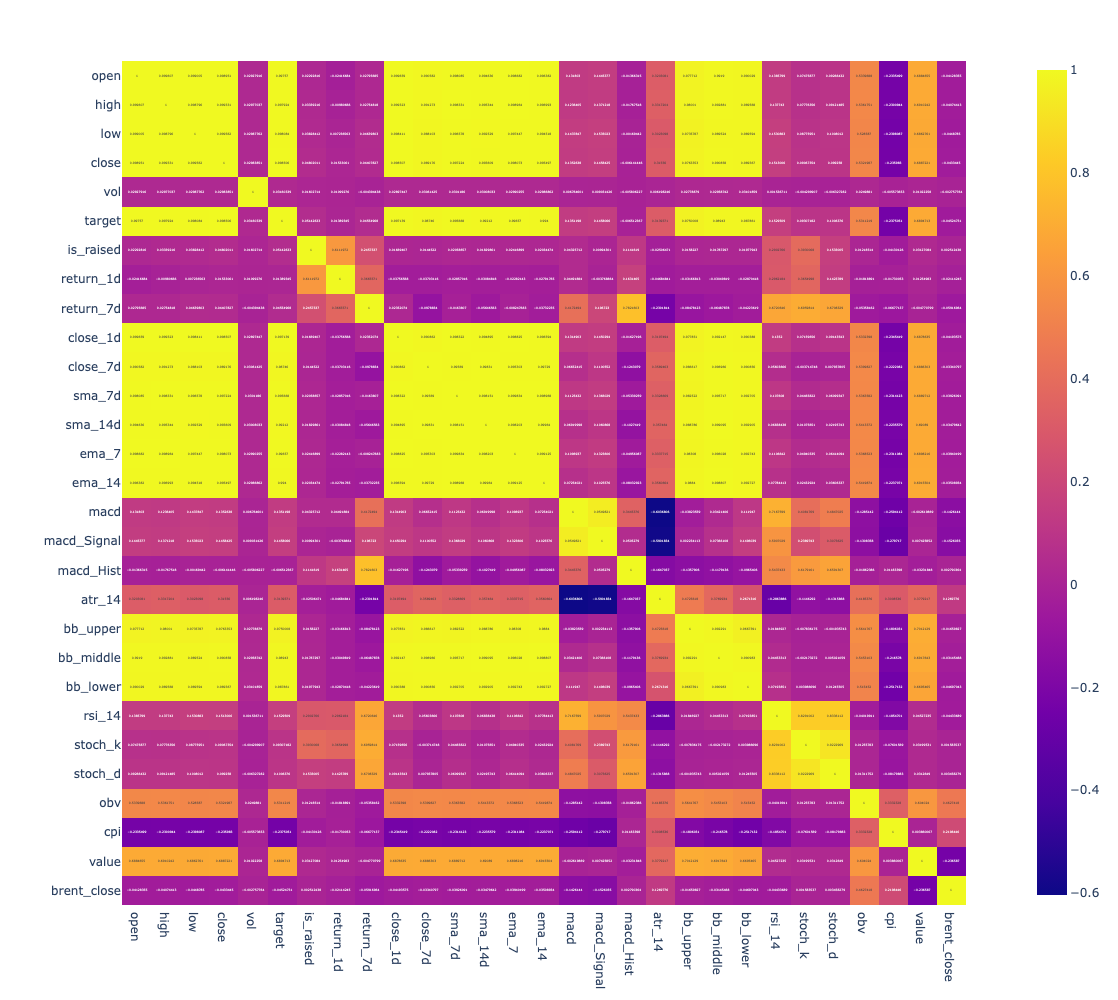

In [1394]:
import matplotlib.pyplot as plt
px.imshow(prepared_df.drop([
'time',
'prediction',
'binar_target',
'binary_prediction',
'date',
'ticker',
'per',
'key_rate'], axis=1).corr(), text_auto=True, height=1000)

In [1392]:
prepared_df.drop([
'time',
'prediction',
'binar_target',
'binary_prediction',
'date',
'ticker',
'per',
'value',
'key_rate'], axis=1).corr()

open      high       low     close       vol    target  \
open         1.000000  0.999607  0.999005  0.998951  0.029279  0.997570   
high         0.999607  1.000000  0.998796  0.999331  0.029770  0.997924   
low          0.999005  0.998796  1.000000  0.999562  0.029878  0.998084   
close        0.998951  0.999331  0.999562  1.000000  0.029839  0.998506   
vol          0.029279  0.029770  0.029878  0.029839  1.000000  0.031603   
target       0.997570  0.997924  0.998084  0.998506  0.031603  1.000000   
is_raised    0.022928  0.033392  0.038284  0.048020  0.016027  0.051426   
return_1d   -0.024167 -0.009807  0.007237  0.015331  0.010993  0.013893   
return_7d    0.027957  0.027548  0.046398  0.044078 -0.004394  0.045550   
close_1d     0.999659  0.999323  0.998411  0.998507  0.028974  0.997139   
close_7d     0.990582  0.991273  0.988103  0.989176  0.030614  0.987460   
sma_7d       0.998085  0.998331  0.996578  0.997224  0.030119  0.995668   
sma_14d      0.994636  0.995344  0.992529  0.993609  0.030080  0.992120   
ema_7        0.998682  0.998964  0.997447  0.998073  0.029903  0.996570   
ema_14       0.996382  0.996993  0.994518  0.995497  0.029869  0.994000   
macd         0.131803  0.123641  0.143785  0.135264  0.006765  0.135120   
macd_Signal  0.144538  0.137122  0.153502  0.145843  0.009031  0.145807   
macd_Hist   -0.013663 -0.017675 -0.001694 -0.006141 -0.005806 -0.006512   
atr_14       0.320308  0.331720  0.302310  0.315560  0.006198  0.313937   
bb_upper     0.977712  0.980010  0.973579  0.976335  0.027789  0.975001   
bb_middle    0.991900  0.992881  0.989524  0.990858  0.029587  0.989430   
bb_lower     0.990029  0.989568  0.989594  0.989367  0.031019  0.987861   
rsi_14       0.138580  0.137743  0.153088  0.151301  0.001537  0.152951   
stoch_k      0.074759  0.077764  0.087760  0.090674 -0.004300  0.093072   
stoch_d      0.092664  0.091215  0.100801  0.099258 -0.006327  0.100638   
obv          0.533969  0.536175  0.528587  0.532199  0.024988  0.531122   
cpi         -0.233550 -0.230094 -0.239809 -0.235983 -0.005574 -0.237505   
brent_close -0.041284 -0.040744 -0.044879 -0.043344 -0.002758 -0.045247   

             is_raised  return_1d  return_7d  close_1d  ...    atr_14  \
open          0.022928  -0.024167   0.027957  0.999659  ...  0.320308   
high          0.033392  -0.009807   0.027548  0.999323  ...  0.331720   
low           0.038284   0.007237   0.046398  0.998411  ...  0.302310   
close         0.048020   0.015331   0.044078  0.998507  ...  0.315560   
vol           0.016027   0.010993  -0.004394  0.028974  ...  0.006198   
target        0.051426   0.013893   0.045550  0.997139  ...  0.313937   
is_raised     1.000000   0.611197   0.245734  0.016694  ... -0.025065   
return_1d     0.611197   1.000000   0.366557 -0.037566  ... -0.046848   
return_7d     0.245734   0.366557   1.000000  0.023521  ... -0.230181   
close_1d      0.016694  -0.037566   0.023521  1.000000  ...  0.319749   
close_7d      0.014452  -0.037031  -0.097883  0.990862  ...  0.358946   
sma_7d        0.020587  -0.028570  -0.016381  0.998322  ...  0.332867   
sma_14d       0.018299  -0.030848  -0.056466  0.994895  ...  0.357464   
ema_7         0.024169  -0.022821  -0.008248  0.998825  ...  0.333771   
ema_14        0.020345  -0.027918  -0.037322  0.996594  ...  0.356066   
macd          0.043257   0.044919   0.417249  0.131490  ... -0.603681   
macd_Signal   0.009943  -0.003769   0.196723  0.145029  ... -0.590183   
macd_Hist     0.114162   0.163146   0.782160 -0.016272  ... -0.164704   
atr_14       -0.025065  -0.046848  -0.230181  0.319749  ...  1.000000   
bb_upper      0.015823  -0.031668  -0.084781  0.977851  ...  0.472562   
bb_middle     0.017873  -0.030498  -0.064879  0.992147  ...  0.376993   
bb_lower      0.019779  -0.028704  -0.042236  0.990388  ...  0.267132   
rsi_14        0.290277   0.296218   0.672065  0.135200  ... -0.286389   
stoch_k       0.393007   0.365500   0.695981  0.071597  ... -0.114629   
stoch_d       0.

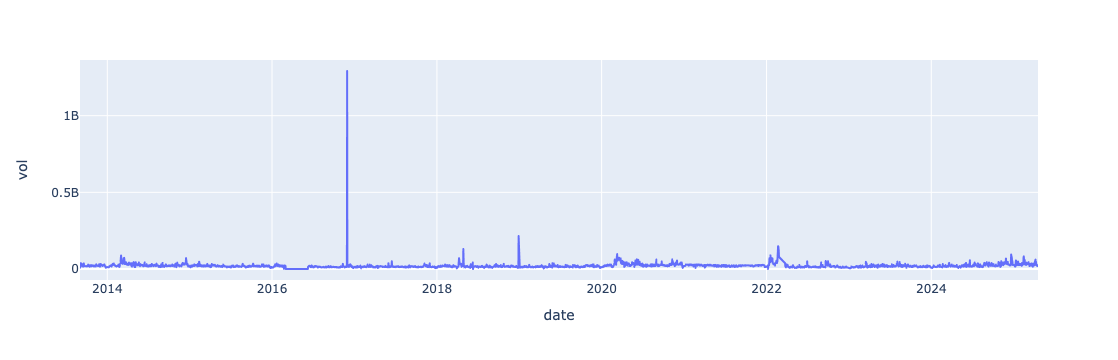

In [1405]:
px.line(prepared_df[prepared_df['vol']<5e9], x='date', y='vol')

## Парсинг новостей

In [1448]:
import time
class lentaRu_parser:
    def __init__(self):
        pass
    
    
    def _get_url(self, param_dict: dict) -> str:
        """
        Возвращает URL для запроса json таблицы со статьями

        url = 'https://lenta.ru/search/v2/process?'\
        + 'from=0&'\                       # Смещение
        + 'size=1000&'\                    # Кол-во статей
        + 'sort=2&'\                       # Сортировка по дате (2), по релевантности (1)
        + 'title_only=0&'\                 # Точная фраза в заголовке
        + 'domain=1&'\                     # ??
        + 'modified%2Cformat=yyyy-MM-dd&'\ # Формат даты
        + 'type=1&'\                       # Материалы. Все материалы (0). Новость (1)
        + 'bloc=4&'\                       # Рубрика. Экономика (4). Все рубрики (0)
        + 'modified%2Cfrom=2020-01-01&'\
        + 'modified%2Cto=2020-11-01&'\
        + 'query='                         # Поисковой запрос
        """
        hasType = int(param_dict['type']) != 0
        hasBloc = int(param_dict['bloc']) != 0

        url = 'https://lenta.ru/search/v2/process?'\
        + 'from={}&'.format(param_dict['from'])\
        + 'size={}&'.format(param_dict['size'])\
        + 'sort={}&'.format(param_dict['sort'])\
        + 'title_only={}&'.format(param_dict['title_only'])\
        + 'domain={}&'.format(param_dict['domain'])\
        + 'modified%2Cformat=yyyy-MM-dd&'\
        + 'type={}&'.format(param_dict['type']) * hasType\
        + 'bloc={}&'.format(param_dict['bloc']) * hasBloc\
        + 'modified%2Cfrom={}&'.format(param_dict['dateFrom'])\
        + 'modified%2Cto={}&'.format(param_dict['dateTo'])\
        + 'query={}'.format(param_dict['query'])
        
        return url


    def _get_search_table(self, param_dict: dict) -> pd.DataFrame:
        """
        Возвращает pd.DataFrame со списком статей
        """
        status_code = -1
        while status_code != 200:
            try:
                url = self._get_url(param_dict)
                print(url)
                r = rq.get(url)
                status_code = r.status_code
                print(status_code)
                search_table = pd.DataFrame(r.json()['matches'])
            except:
                time.sleep(15)
        
        return search_table

    
    def get_articles(self,
                     param_dict,
                     time_step = 10,
                     save_every = 5, 
                     save_excel = True) -> pd.DataFrame:
        """
        Функция для скачивания статей интервалами через каждые time_step дней
        Делает сохранение таблицы через каждые save_every * time_step дней

        param_dict: dict
        ### Параметры запроса 
        ###### project - раздел поиска, например, rbcnews
        ###### category - категория поиска, например, TopRbcRu_economics
        ###### dateFrom - с даты
        ###### dateTo - по дату
        ###### offset - смещение поисковой выдачи
        ###### limit - лимит статей, максимум 100
        ###### query - поисковой запрос (ключевое слово), например, РБК

        """
        param_copy = param_dict.copy()
        time_step = timedelta(days=time_step)
        dateFrom = datetime.strptime(param_copy['dateFrom'], '%Y-%m-%d')
        dateTo = datetime.strptime(param_copy['dateTo'], '%Y-%m-%d')
        if dateFrom > dateTo:
            raise ValueError('dateFrom should be less than dateTo')
        
        out = pd.DataFrame()
        save_counter = 0

        while dateFrom <= dateTo:
            param_copy['dateTo'] = (dateFrom + time_step).strftime('%Y-%m-%d')
            if dateFrom + time_step > dateTo:
                param_copy['dateTo'] = dateTo.strftime('%Y-%m-%d')
            print('Parsing articles from '\
                  + param_copy['dateFrom'] +  ' to ' + param_copy['dateTo'])
            out = pd.concat([out, self._get_search_table(param_copy)], axis=0, ignore_index=True)
            dateFrom += time_step + timedelta(days=1)
            param_copy['dateFrom'] = dateFrom.strftime('%Y-%m-%d')
            save_counter += 1
            if save_counter == save_every:
                display.clear_output(wait=True)
                out.to_excel("/tmp/checkpoint_table.xlsx")
                print('Checkpoint saved!')
                save_counter = 0
            
        if save_excel:
            out.to_excel("lenta_{}_{}.xlsx".format(
                param_dict['dateFrom'],
                param_dict['dateTo']))
        print('Finish')
        
        return out


In [1932]:
datetime('2023-01-01')

TypeError: an integer is required (got type str)

In [1470]:
use_parser = "LentaRu"

query = ''
offset = 0
size = 500
sort = "3"
title_only = "0"
domain = "1"
material = "0"
bloc = "4"
dateFrom = '2013-01-01'
dateTo = "2025-04-28"

if use_parser == "LentaRu":
    param_dict = {'query'     : query, 
                  'from'      : str(offset),
                  'size'      : str(size),
                  'dateFrom'  : dateFrom,
                  'dateTo'    : dateTo,
                  'sort'      : sort,
                  'title_only': title_only,
                  'type'      : material, 
                  'bloc'      : bloc,
                  'domain'    : domain}

print(use_parser, "- param_dict:", param_dict)


LentaRu - param_dict: {'query': '', 'from': '0', 'size': '500', 'dateFrom': '2013-01-01', 'dateTo': '2025-04-28', 'sort': '3', 'title_only': '0', 'type': '0', 'bloc': '4', 'domain': '1'}


In [1471]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython import display

assert use_parser == "LentaRu"
parser = lentaRu_parser()
tbl = parser.get_articles(param_dict=param_dict,
                         time_step = 4,
                         save_every = 5, 
                         save_excel = True)
print(len(tbl.index))
tbl.head()


Checkpoint saved!
Parsing articles from 2025-04-28 to 2025-04-28
https://lenta.ru/search/v2/process?from=0&size=500&sort=3&title_only=0&domain=1&modified%2Cformat=yyyy-MM-dd&bloc=4&modified%2Cfrom=2025-04-28&modified%2Cto=2025-04-28&query=
200
Finish
116219


rightcol   docid  lastmodtime  \
0  Сенат одобрил соглашение, предотвращающее ради...  487378   1670854688   
1  Билеты на проезд в плацкартных и общих вагонах...  487386   1670854690   
2  Второе заседание палаты назначено на вечер 1 я...  487407   1670854695   
3  В ближайшие часы документ должен подписать Бар...  487412   1670854696   
4  Самым удачливым миллиардером оказался испанец ...  487419   1670854698   

   part                                              title  type  \
0     0         Сенат США не допустит "фискального обрыва"     1   
1     0  Названа дата повышения стоимости проезда в пла...     1   
2     0  Палата представителей США отложила голосование...     1   
3     0  Палата представителей утвердила план предотвра...     1   
4     0  Мировые богачи приумножили свое состояние на ч...     1   

                                               url tags  bloc  domain  \
0         https://lenta.ru/news/2013/01/01/fiskal/   []     4       1   
1  https://lenta.ru/news/2013/01/01/railwaytohell/   []     4       1   
2          https://lenta.ru/news/2013/01/02/cliff/   []     4       1   
3         https://lenta.ru/news/2013/01/02/fiscal/   []     4       1   
4       https://lenta.ru/news/2013/01/02/billions/   []     4       1   

     modified                                          image_url  \
0  1357040780  https://icdn.lenta.ru/images/0000/0000/0000000...   
1  1357051338  https://icdn.lenta.ru/images/0000/0000/0000000...   
2  1357092265  https://icdn.lenta.ru/images/0000/0000/0000000...   
3  1357114659  https://icdn.lenta.ru/images/0000/0000/0000000...   
4  1357127900  https://icdn.lenta.ru/images/0000/0000/0000000...   

                                                text  status     pubdate  \
0  Джо Байден после переговоров с Сенатом. Фото (...       0  1357040780   
1  Фото РИА Новости, Владимир Астапкович С 1 янва...       0  1357051338   
2  Спикер Палаты представителей Джон Бейнер после...       0  1357092265   
3  Здание Конгресса США. Фото ©AFP Палата предста...       0  1357114659   
4  Карлос Слим. Фото Reuters 100 богатейших людей...       0  1357127900   

                                             snippet  
0  Джо Байден после переговоров с Сенатом. Фото (...  
1  Фото РИА Новости, Владимир Астапкович С ... по...  
2  Спикер Палаты представителей Джон Бейнер после...  
3  Здание Конгресса США. Фото ©AFP Палата предста...  
4  Карлос Слим. Фото Reuters 100 богатейших людей...

In [1493]:
tbl['date'] = pd.to_datetime(tbl['pubdate'],unit='s').dt.date.apply(pd.to_datetime)
tbl

rightcol    docid  \
0       Сенат одобрил соглашение, предотвращающее ради...   487378   
1       Билеты на проезд в плацкартных и общих вагонах...   487386   
2       Второе заседание палаты назначено на вечер 1 я...   487407   
3       В ближайшие часы документ должен подписать Бар...   487412   
4       Самым удачливым миллиардером оказался испанец ...   487419   
...                                                   ...      ...   
116214     Ущерб от масштабного блэкаута в Европе оценили  1826267   
116215  США ввели санкции против доставлявшего российс...  1826328   
116216  Цифровая экосистема запустит летние стажировки...  1826308   
116217  В Москве прошла организованная Центром роботот...  1826354   
116218  Россиянка поговорила с мошенниками и лишилась ...  1826349   

        lastmodtime  part                                              title  \
0        1670854688     0         Сенат США не допустит "фискального обрыва"   
1        1670854690     0  Названа дата повышения стоимости проезда в пла...   
2        1670854695     0  Палата представителей США отложила голосование...   
3        1670854696     0  Палата представителей утвердила план предотвра...   
4        1670854698     0  Мировые богачи приумножили свое состояние на ч...   
...             ...   ...                                                ...   
116214   1745861530     0     Ущерб от масштабного блэкаута в Европе оценили   
116215   1745863498     1  США ввели санкции против доставлявшего российс...   
116216   1745862943     0  Цифровая экосистема запустит летние стажировки...   
116217   1745864026     0  В Москве прошла организованная Центром роботот...   
116218   1745870371     0  Россиянка поговорила с мошенниками и лишилась ...   

        type                                                url      tags  \
0          1           https://lenta.ru/news/2013/01/01/fiskal/        []   
1          1    https://lenta.ru/news/2013/01/01/railwaytohell/        []   
2          1            https://lenta.ru/news/2013/01/02/cliff/        []   
3          1           https://lenta.ru/news/2013/01/02/fiscal/        []   
4          1         https://lenta.ru/news/2013/01/02/billions/        []   
...      ...                                                ...       ...   
116214     1  https://lenta.ru/news/2025/04/28/uscherb-ot-ma...     [389]   
116215     1         https://lenta.ru/news/2025/04/28/sanktsii/       [7]   
116216     1  https://lenta.ru/news/2025/04/28/tsifrovaya-ek...       [9]   
116217     1  https://lenta.ru/news/2025/04/28/v-moskve-pros...  [9, 145]   
116218     1  https://lenta.ru/news/2025/04/28/rossiyanka-po...     [388]   

        bloc  domain    modified  \
0          4       1  1357040780   
1          4       1  1357051338   
2          4       1  1357092265   
3          4       1  1357114659   
4          4       1  1357127900   
...      ...     ...         ...   
116214     4       1  1745860620   
116215     4       1  1745862360   
116216     4       1  1745862900   
116217     4       1  1745864025   
116218     4       1  1745870371   

                                                image_url  \
0       https://icdn.lenta.ru/images/0000/0000/0000000...   
1       https://icdn.lenta.ru/images/0000/0000/0000000...   
2       https://icdn.lenta.ru/images/0000/0000/0000000...   
3       https://icdn.lenta.ru/images/0000/0000/0000000...   
4       https://icdn.lenta.ru/images/0000/0000/0000000...   
...                                                   ...   
116214  https://icdn.lenta.ru/images/2025/04/28/18/202...   
116215  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116216  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116217  https://icdn.lenta.ru/images/2025/04/28/21/202...   
116218  https://icdn.lenta.ru/images/2025/04/28/21/202...   

                                                     text  status     pubdate  \
0       Джо Байден после переговоров с Сенатом. Фото (...       0  13570407

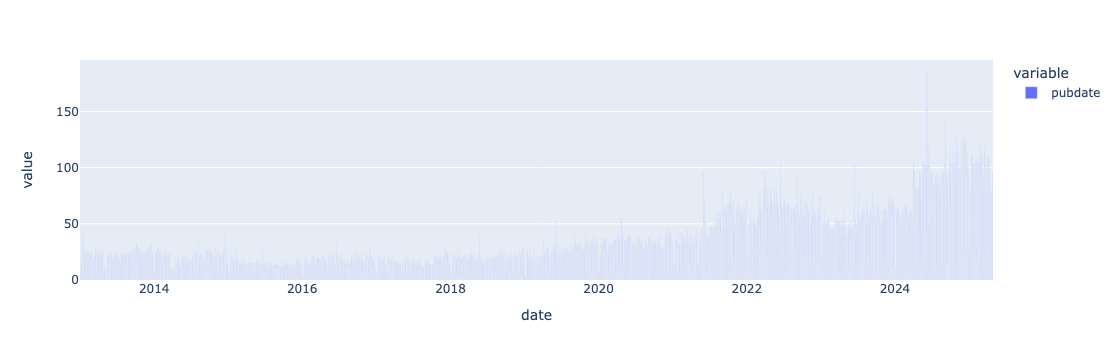

In [1473]:
px.bar(tbl.groupby('date')['pubdate'].count())

In [1474]:
tbl.to_csv('news.csv')

In [1478]:
tbl.iloc[116121]['url']

'https://lenta.ru/news/2025/04/27/v-rossii-snova-propal-loh/'

In [1494]:
tbl['date']

0        2013-01-01
1        2013-01-01
2        2013-01-02
3        2013-01-02
4        2013-01-02
            ...    
116214   2025-04-28
116215   2025-04-28
116216   2025-04-28
116217   2025-04-28
116218   2025-04-28
Name: date, Length: 116219, dtype: datetime64[ns]

In [1496]:
tbl[tbl['date'] == '2025-04-25']

rightcol    docid  \
116012        Силуанов оценил состояние мировой экономики  1824479   
116013            В России выросли продажи одного напитка  1824486   
116014  Силуанов заявил об исторически минимальной без...  1824488   
116015  Для экономики России сильный рубль оказался оп...  1824494   
116016            Раскрыт способ сэкономить на оплате ЖКУ  1824496   
...                                                   ...      ...   
116090  МВФ спрогнозировал окончание конфликта на Украине  1825094   
116091  В несколько российских регионов в ближайшие тр...  1825121   
116092           В России объяснили повышение цен на пиво  1825149   
116093  Набиуллина назвала риски для российской экономики  1825155   
116094      Ряду россиян анонсировали две пенсии в апреле  1825167   

        lastmodtime  part                                              title  \
116012   1745553959     0        Силуанов оценил состояние мировой экономики   
116013   1745555098     0            В России выросли продажи одного напитка   
116014   1745555739     0  Силуанов заявил об исторически минимальной без...   
116015   1745556853     0  Для экономики России сильный рубль оказался оп...   
116016   1745557763     0            Раскрыт способ сэкономить на оплате ЖКУ   
...             ...   ...                                                ...   
116090   1745605082     0  МВФ спрогнозировал окончание конфликта на Украине   
116091   1745610708     0  В несколько российских регионов в ближайшие тр...   
116092   1745617168     0           В России объяснили повышение цен на пиво   
116093   1745621854     0  Набиуллина назвала риски для российской экономики   
116094   1745625414     0      Ряду россиян анонсировали две пенсии в апреле   

        type                                                url   tags  bloc  \
116012     1  https://lenta.ru/news/2025/04/25/siluanov-otse...    [7]     4   
116013     1  https://lenta.ru/news/2025/04/25/v-rossii-vyro...    [8]     4   
116014     1  https://lenta.ru/news/2025/04/25/siluanov-zaya...    [7]     4   
116015     1  https://lenta.ru/news/2025/04/25/dlya-ekonomik...    [8]     4   
116016     1  https://lenta.ru/news/2025/04/25/raskryt-sposo...  [388]     4   
...      ...                                                ...    ...   ...   
116090     1  https://lenta.ru/news/2025/04/25/mvf-sprognozi...  [198]     4   
116091     1           https://lenta.ru/news/2025/04/25/pogoda/  [390]     4   
116092     1  https://lenta.ru/news/2025/04/26/v-rossii-ob-y...    [9]     4   
116093     1       https://lenta.ru/news/2025/04/26/nabiullina/    [7]     4   
116094     1  https://lenta.ru/news/2025/04/26/ryadu-rossiya...  [198]     4   

        domain    modified                                          image_url  \
116012       1  1745553880  https://icdn.lenta.ru/images/2025/04/25/07/202...   
116013       1  1745555042  https://icdn.lenta.ru/images/2025/04/25/07/202...   
116014       1  1745555641  https://icdn.lenta.ru/images/2025/04/25/07/202...   
116015       1  1745556720  https://icdn.lenta.ru/images/2025/04/25/07/202...   
116016       1  1745557519  https://icdn.lenta.ru/images/2025/04/25/08/202...   
...        ...         ...                                                ...   
116090       1  1745603460  https://icdn.lenta.ru/images/2025/04/25/20/202...   
116091       1  1745610360  https://icdn.lenta.ru/images/2025/04/25/22/202...   
116092       1  1745617168  https://icdn.lenta.ru/images/2025/04/26/00/202...   
116093       1  1745619600  https://icdn.lenta.ru/images/2025/04/26/01/202...   
116094       1  1745624220  https://icdn.lenta.ru/images/2025/04/26/02/202...   

                                                     text  status     pubdate  \
116012  Антон Силуанов Фото: Vyacheslav Nemyshev / URA...       0  1745553880   
116013  Фото: Алексей Никольский / РИА Новости Кирилл ...       0  1745555042   
116014  Антон Силуанов Фото: Владимир Федоренко / РИА ...       0  174

In [1480]:
parser.get_articles(param_dict=param_dict, 
                         time_step = 4, 
                         save_every = 5,  
                         save_excel = False) 

Parsing articles from 2013-01-01 to 2013-01-05
https://lenta.ru/search/v2/process?from=0&size=500&sort=3&title_only=0&domain=1&modified%2Cformat=yyyy-MM-dd&bloc=4&modified%2Cfrom=2013-01-01&modified%2Cto=2013-01-05&query=
200
Parsing articles from 2013-01-06 to 2013-01-10
https://lenta.ru/search/v2/process?from=0&size=500&sort=3&title_only=0&domain=1&modified%2Cformat=yyyy-MM-dd&bloc=4&modified%2Cfrom=2013-01-06&modified%2Cto=2013-01-10&query=
200
Parsing articles from 2013-01-11 to 2013-01-15
https://lenta.ru/search/v2/process?from=0&size=500&sort=3&title_only=0&domain=1&modified%2Cformat=yyyy-MM-dd&bloc=4&modified%2Cfrom=2013-01-11&modified%2Cto=2013-01-15&query=
200
Parsing articles from 2013-01-16 to 2013-01-20
https://lenta.ru/search/v2/process?from=0&size=500&sort=3&title_only=0&domain=1&modified%2Cformat=yyyy-MM-dd&bloc=4&modified%2Cfrom=2013-01-16&modified%2Cto=2013-01-20&query=


KeyboardInterrupt: 

In [1501]:
keywords = ["санкции", "нефть", "ЦБ РФ", "дивиденды", "Мосбиржа"]
filtered_news = [n for n in tbl if any(word in n["text"] for word in keywords)]

TypeError: string indices must be integers

In [1525]:
from pymorphy2 import MorphAnalyzer
import re
from tqdm import tqdm
tqdm.pandas()

morph = MorphAnalyzer()

def normalize_word(word):
    return morph.parse(word.lower())[0].normal_form

# Улучшенная фильтрация с приведением к нормальной форме
def contains_keywords(text, keywords):
    words = set(normalize_word(w) for w in re.findall(r'\w+', text.lower()))
    keywords_normalized = [normalize_word(kw) for kw in keywords]
    return any(kw in words for kw in keywords_normalized)

# Применяем к DataFrame
tbl['is_relevant'] = tbl['text'].progress_apply(lambda x: contains_keywords(x, keywords))

  1%|▌                                  | 1661/116219 [01:15<1:27:11, 21.90it/s]


KeyboardInterrupt: 

In [1618]:
keywords = ['ЦБ РФ', 
            'нефть', 
            'IMOEX', 
            'санкции', 
            'дивиденды', 
            'президент', 
            'сша', 
            'трамп', 
            'путин', 
            'лавров', 
            'цб', 
            'сбербанк', 
            'яндекс', 
            'лукойл',
            'война',
            'ближний восток',
            'нато',
            'курс',
            'опек',
            'минфин',
            'правительство',
            'одкб',
            'макрон',
            'меркель',
            'германия',
            'франция',
            'великобритания',
            'испания',
            'италия',
            'газ',
            'северный поток',
            'мосбиржа',
            'урегулирование',
            'мир',
            'война',
            'сво',
            'лукашенко',
            'силуанов',
            'Набиуллина',
            'нарышкин',
            'шойгу',
            'белоусов',
            'экономика',
            'риски',
            'застройщики',
            'ключевая ставка',
            'ставка',
            'инфляция',
            'ввп',
            'медведев',
           'газпром',
           'украина',
           'байден',
           'обама',
           'порошенко',
           'зеленский',
           'Система',
           'Аэрофлот',
           'Алроса',
           'Астра',
           'Московский кредитный банк',
           'мкб'
            'Северсталь',
            'санкция',
            'санкционный список',
            'En+ Group',
          'ФСК-Россети',
            'специальная военная операция',
            'спецоперация',
          'Совкомфлот',
            'Газпром',
            'Норникель',
            'Хэдхантер',
            'РусГидро',
            'Интер РАО',
            'Европлан',
            'Лукойл',
            'MAGN',
            'Магнит',
            'Московская биржа',
            'мосбиржа',
            'Мосэнерго',
            'Мечел',
            'МТС',
            'НЛМК',
            'НОВАТЭК',
            'ФосАгро',
            'ГК ПИК',
            'Полюс',
            'Роснефть',
            'европа',
            'евросоюз',
            'ес',
            'Ростелеком',
            'РУСАЛ',
            'Сбер',
            'Селигдар',
            'ГК Самолет',
            'Сургутнефтегаз',
            'Совкомбанк',
            'ТКС Холдинг',
            'Татнефть',
            'Транснефть',
            'ЮГК',
            'Юнипро',
            'ВК',
            'ВТБ',
            'Яндекс',
]

In [1531]:
from functools import lru_cache

@lru_cache(maxsize=100000)  # Кеш на 100k слов
def normalize_word_cached(word):
    return morph.parse(word.lower())[0].normal_form

def optimized_contains(text, keywords, cache):
    words = set(cache.get(w.lower(), w.lower()) for w in re.findall(r'\w+', text.lower()))
    return any(kw in words for kw in keywords)

# Подготовка кеша
word_cache = {word: normalize_word_cached(word) for word in set(" ".join(tbl[~tbl['text'].isna()]['text']).lower().split())}
keywords_normalized = [normalize_word_cached(kw) for kw in keywords]

# Применение
tbl['is_relevant'] = tbl['text'].progress_apply(lambda x: optimized_contains(x, keywords_normalized, word_cache))

 29%|█████████▉                        | 33871/116219 [00:04<00:11, 7249.07it/s]


AttributeError: 'NoneType' object has no attribute 'lower'

In [1574]:
tbl['is_relevant'] = tbl['text'].progress_apply(lambda x: optimized_contains(x, keywords_normalized, word_cache) if x is not None else False)

100%|█████████████████████████████████| 116219/116219 [00:14<00:00, 7852.38it/s]


In [1556]:
contains_keywords(tbl[tbl['is_relevant']]['text'][116218], keywords)

True

In [1730]:
tbl['is_relevant'] = tbl['title'].str.contains('\\b(' + '|'.join(keywords) + ')\\b', case=False, regex=True, na=False)

/var/folders/vv/554bsc4n3x96xwcdtn4ch09w0000gn/T/ipykernel_19500/529160928.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [1732]:
tbl

rightcol    docid  \
0       Сенат одобрил соглашение, предотвращающее ради...   487378   
1       Билеты на проезд в плацкартных и общих вагонах...   487386   
2       Второе заседание палаты назначено на вечер 1 я...   487407   
3       В ближайшие часы документ должен подписать Бар...   487412   
4       Самым удачливым миллиардером оказался испанец ...   487419   
...                                                   ...      ...   
116214     Ущерб от масштабного блэкаута в Европе оценили  1826267   
116215  США ввели санкции против доставлявшего российс...  1826328   
116216  Цифровая экосистема запустит летние стажировки...  1826308   
116217  В Москве прошла организованная Центром роботот...  1826354   
116218  Россиянка поговорила с мошенниками и лишилась ...  1826349   

        lastmodtime  part                                              title  \
0        1670854688     0         Сенат США не допустит "фискального обрыва"   
1        1670854690     0  Названа дата повышения стоимости проезда в пла...   
2        1670854695     0  Палата представителей США отложила голосование...   
3        1670854696     0  Палата представителей утвердила план предотвра...   
4        1670854698     0  Мировые богачи приумножили свое состояние на ч...   
...             ...   ...                                                ...   
116214   1745861530     0     Ущерб от масштабного блэкаута в Европе оценили   
116215   1745863498     1  США ввели санкции против доставлявшего российс...   
116216   1745862943     0  Цифровая экосистема запустит летние стажировки...   
116217   1745864026     0  В Москве прошла организованная Центром роботот...   
116218   1745870371     0  Россиянка поговорила с мошенниками и лишилась ...   

        type                                                url      tags  \
0          1           https://lenta.ru/news/2013/01/01/fiskal/        []   
1          1    https://lenta.ru/news/2013/01/01/railwaytohell/        []   
2          1            https://lenta.ru/news/2013/01/02/cliff/        []   
3          1           https://lenta.ru/news/2013/01/02/fiscal/        []   
4          1         https://lenta.ru/news/2013/01/02/billions/        []   
...      ...                                                ...       ...   
116214     1  https://lenta.ru/news/2025/04/28/uscherb-ot-ma...     [389]   
116215     1         https://lenta.ru/news/2025/04/28/sanktsii/       [7]   
116216     1  https://lenta.ru/news/2025/04/28/tsifrovaya-ek...       [9]   
116217     1  https://lenta.ru/news/2025/04/28/v-moskve-pros...  [9, 145]   
116218     1  https://lenta.ru/news/2025/04/28/rossiyanka-po...     [388]   

        bloc  domain    modified  \
0          4       1  1357040780   
1          4       1  1357051338   
2          4       1  1357092265   
3          4       1  1357114659   
4          4       1  1357127900   
...      ...     ...         ...   
116214     4       1  1745860620   
116215     4       1  1745862360   
116216     4       1  1745862900   
116217     4       1  1745864025   
116218     4       1  1745870371   

                                                image_url  \
0       https://icdn.lenta.ru/images/0000/0000/0000000...   
1       https://icdn.lenta.ru/images/0000/0000/0000000...   
2       https://icdn.lenta.ru/images/0000/0000/0000000...   
3       https://icdn.lenta.ru/images/0000/0000/0000000...   
4       https://icdn.lenta.ru/images/0000/0000/0000000...   
...                                                   ...   
116214  https://icdn.lenta.ru/images/2025/04/28/18/202...   
116215  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116216  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116217  https://icdn.lenta.ru/images/2025/04/28/21/202...   
116218  https://icdn.lenta.ru/images/2025/04/28/21/202...   

                                                     text  status     pubdate  \
0       Джо Байден после переговоров с Сенатом. Фото (...       0  13570407

In [1621]:
tbl[tbl['is_relevant']]

rightcol    docid  \
0       Сенат одобрил соглашение, предотвращающее ради...   487378   
1       Билеты на проезд в плацкартных и общих вагонах...   487386   
2       Второе заседание палаты назначено на вечер 1 я...   487407   
3       В ближайшие часы документ должен подписать Бар...   487412   
5              США удержались на краю финансовой пропасти   487422   
...                                                   ...      ...   
116213  Мосбиржа допустила до торгов акции Amazon и Ne...  1826337   
116214     Ущерб от масштабного блэкаута в Европе оценили  1826267   
116215  США ввели санкции против доставлявшего российс...  1826328   
116216  Цифровая экосистема запустит летние стажировки...  1826308   
116217  В Москве прошла организованная Центром роботот...  1826354   

        lastmodtime  part                                              title  \
0        1670854688     0         Сенат США не допустит "фискального обрыва"   
1        1670854690     0  Названа дата повышения стоимости проезда в пла...   
2        1670854695     0  Палата представителей США отложила голосование...   
3        1670854696     0  Палата представителей утвердила план предотвра...   
5        1670854699     0                                  Ни единого обрыва   
...             ...   ...                                                ...   
116213   1745861951     1  Мосбиржа допустила до торгов акции Amazon и Ne...   
116214   1745861530     0     Ущерб от масштабного блэкаута в Европе оценили   
116215   1745863498     1  США ввели санкции против доставлявшего российс...   
116216   1745862943     0  Цифровая экосистема запустит летние стажировки...   
116217   1745864026     0  В Москве прошла организованная Центром роботот...   

        type                                                url      tags  \
0          1           https://lenta.ru/news/2013/01/01/fiskal/        []   
1          1    https://lenta.ru/news/2013/01/01/railwaytohell/        []   
2          1            https://lenta.ru/news/2013/01/02/cliff/        []   
3          1           https://lenta.ru/news/2013/01/02/fiscal/        []   
5          2      https://lenta.ru/articles/2013/01/02/nocliff/        []   
...      ...                                                ...       ...   
116213     1          https://lenta.ru/news/2025/04/28/mmozhno/       [8]   
116214     1  https://lenta.ru/news/2025/04/28/uscherb-ot-ma...     [389]   
116215     1         https://lenta.ru/news/2025/04/28/sanktsii/       [7]   
116216     1  https://lenta.ru/news/2025/04/28/tsifrovaya-ek...       [9]   
116217     1  https://lenta.ru/news/2025/04/28/v-moskve-pros...  [9, 145]   

        bloc  domain    modified  \
0          4       1  1357040780   
1          4       1  1357051338   
2          4       1  1357092265   
3          4       1  1357114659   
5          4       1  1357152222   
...      ...     ...         ...   
116213     4       1  1745860560   
116214     4       1  1745860620   
116215     4       1  1745862360   
116216     4       1  1745862900   
116217     4       1  1745864025   

                                                image_url  \
0       https://icdn.lenta.ru/images/0000/0000/0000000...   
1       https://icdn.lenta.ru/images/0000/0000/0000000...   
2       https://icdn.lenta.ru/images/0000/0000/0000000...   
3       https://icdn.lenta.ru/images/0000/0000/0000000...   
5       https://icdn.lenta.ru/images/0000/0000/0000000...   
...                                                   ...   
116213  https://icdn.lenta.ru/images/2025/04/28/20/202...   
116214  https://icdn.lenta.ru/images/2025/04/28/18/202...   
116215  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116216  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116217  https://icdn.lenta.ru/images/2025/04/28/21/202...   

                                                     text  status     pubdate  \
0       Джо Байден после переговоров с Сенатом. Фото (...       0  13570407

In [1623]:
!pip3 install transformers
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = BertModel.from_pretrained("DeepPavlov/rubert-base-cased")

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.4 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 481 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 418 kB 215 kB/s eta 0:00:01
     |████████████████████████████████| 284 kB 932 kB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 4.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


KeyboardInterrupt: 

In [1736]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [1738]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

tbl["embedding"] = tbl["title"].progress_apply(get_bert_embedding)

  0%|                                    | 329/116219 [00:11<1:07:41, 28.53it/s]


KeyboardInterrupt: 

In [1739]:
tbl[tbl['is_relevant']].to_csv('relevant_v2.csv')

In [1647]:
!pip3 install --upgrade pandas numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 3.5 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.2
    Uninstalling pandas-2.1.2:
      Successfully uninstalled pandas-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [1658]:
import importlib
importlib.reload(np)
importlib.reload(pd)

print(pd.__version__, np.__version__)

RuntimeError: empty_like method already has a different docstring

In [1653]:
embs_df = pd.read_pickle('embeddings.pkl')

RuntimeError: empty_like method already has a different docstring

In [1654]:
import pickle
with open('embeddings.pkl', 'rb') as f:
    embs_df = pickle.load(f)

RuntimeError: empty_like method already has a different docstring

In [1646]:
print(embs_df['embedding'][0])

[ 5.91718443e-02  1.22367166e-01 -1.50112823e-01  1.56915262e-01
  1.37070641e-01  1.87869936e-01 -3.10106557e-02  7.96273127e-02
  2.91718990e-01  7.55144656e-02  1.70549303e-01  2.78107762e-01
 -1.00522995e-01  8.13752189e-02  8.10710564e-02  9.53340083e-02
 -2.27088094e-01 -3.09075415e-01 -2.56798446e-01  3.21366191e-01
  1.21119671e-01  1.75643727e-01 -1.71483204e-01  1.20414600e-01
  1.65610816e-02 -2.51155466e-01 -1.75619915e-01  2.14965478e-01
 -1.02320537e-01 -1.09163243e-02 -2.67302752e-01  6.20759204e-02
  8.53630900e-03 -2.44150922e-01  3.27932686e-01 -4.38067652e-02
  2.23948255e-01  4.45866697e-02  9.96200889e-02 -9.19498280e-02
 -2.30716869e-01 -1.70678660e-01 -1.45990252e-01  5.71770929e-02
  4.75045815e-02  9.10795406e-02 -3.20115201e-02 -1.01359874e-01
  7.71703944e-03 -2.97531277e-01  7.70050526e-01  1.73075214e-01
 -2.55407214e-01  1.46772802e-01 -2.87999719e-01 -2.45857015e-01
 -4.79302034e-02  1.08303465e-01  9.23932865e-02  1.83260784e-01
  1.21977888e-02  2.44643

In [1656]:
import numpy as np

In [1661]:
prepared_df.to_csv('prepared_df.csv')

In [1729]:
pd.read_csv('news.csv')

Unnamed: 0                                           rightcol  \
0                0  Сенат одобрил соглашение, предотвращающее ради...   
1                1  Билеты на проезд в плацкартных и общих вагонах...   
2                2  Второе заседание палаты назначено на вечер 1 я...   
3                3  В ближайшие часы документ должен подписать Бар...   
4                4  Самым удачливым миллиардером оказался испанец ...   
...            ...                                                ...   
116214      116214     Ущерб от масштабного блэкаута в Европе оценили   
116215      116215  США ввели санкции против доставлявшего российс...   
116216      116216  Цифровая экосистема запустит летние стажировки...   
116217      116217  В Москве прошла организованная Центром роботот...   
116218      116218  Россиянка поговорила с мошенниками и лишилась ...   

          docid  lastmodtime  part  \
0        487378   1670854688     0   
1        487386   1670854690     0   
2        487407   1670854695     0   
3        487412   1670854696     0   
4        487419   1670854698     0   
...         ...          ...   ...   
116214  1826267   1745861530     0   
116215  1826328   1745863498     1   
116216  1826308   1745862943     0   
116217  1826354   1745864026     0   
116218  1826349   1745870371     0   

                                                    title  type  \
0              Сенат США не допустит "фискального обрыва"     1   
1       Названа дата повышения стоимости проезда в пла...     1   
2       Палата представителей США отложила голосование...     1   
3       Палата представителей утвердила план предотвра...     1   
4       Мировые богачи приумножили свое состояние на ч...     1   
...                                                   ...   ...   
116214     Ущерб от масштабного блэкаута в Европе оценили     1   
116215  США ввели санкции против доставлявшего российс...     1   
116216  Цифровая экосистема запустит летние стажировки...     1   
116217  В Москве прошла организованная Центром роботот...     1   
116218  Россиянка поговорила с мошенниками и лишилась ...     1   

                                                      url      tags  bloc  \
0                https://lenta.ru/news/2013/01/01/fiskal/        []     4   
1         https://lenta.ru/news/2013/01/01/railwaytohell/        []     4   
2                 https://lenta.ru/news/2013/01/02/cliff/        []     4   
3                https://lenta.ru/news/2013/01/02/fiscal/        []     4   
4              https://lenta.ru/news/2013/01/02/billions/        []     4   
...                                                   ...       ...   ...   
116214  https://lenta.ru/news/2025/04/28/uscherb-ot-ma...     [389]     4   
116215         https://lenta.ru/news/2025/04/28/sanktsii/       [7]     4   
116216  https://lenta.ru/news/2025/04/28/tsifrovaya-ek...       [9]     4   
116217  https://lenta.ru/news/2025/04/28/v-moskve-pros...  [9, 145]     4   
116218  https://lenta.ru/news/2025/04/28/rossiyanka-po...     [388]     4   

        domain    modified                                          image_url  \
0            1  1357040780  https://icdn.lenta.ru/images/0000/0000/0000000...   
1            1  1357051338  https://icdn.lenta.ru/images/0000/0000/0000000...   
2            1  1357092265  https://icdn.lenta.ru/images/0000/0000/0000000...   
3            1  1357114659  https://icdn.lenta.ru/images/0000/0000/0000000...   
4            1  1357127900  https://icdn.lenta.ru/images/0000/0000/0000000...   
...        ...         ...                                                ...   
116214       1  1745860620  https://icdn.lenta.ru/images/2025/04/28/18/202...   
116215       1  1745862360  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116216       1  1745862900  https://icdn.lenta.ru/images/2025/04/28/19/202...   
116217       1  1745864025  https://icdn.lenta.ru/images/2025/04/28/21/202...   
116218       1  1745870371  https://icdn.lenta.ru/ima

## Новости. Сентимент

In [1744]:
news_df_v2 = pd.read_pickle('news_df_processed.pkl')
agg_sent = news_df_v2.groupby('date').apply(lambda x: (x['label']*x['score']).sum()).reset_index(name='sentiment')

In [1755]:
agg_sent['date']=agg_sent['date'].apply(pd.Timestamp)

In [1756]:
agg_sent['date']

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-07
          ...    
3877   2025-04-24
3878   2025-04-25
3879   2025-04-26
3880   2025-04-27
3881   2025-04-28
Name: date, Length: 3882, dtype: datetime64[ns]

In [1770]:
prepared_df_w_sentiment = pd.merge(prepared_df, agg_sent, on='date', how='left')
prepared_df_w_sentiment['sentiment'].fillna(0, inplace=True)

In [1880]:
df_for_nn = prepared_df_w_sentiment.copy()
df_for_nn['log_return'] = np.log(df_for_nn['close'])
df_for_nn.dropna(inplace=True)

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)
    
features = ['close', 'brent_close', 'cpi', 'value', 'vol', 'sentiment']
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'log_return', window_size)


train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1790]:
writer = SummaryWriter('logs/exp1/sentiment_regression_12')
model = AttentionLSTMRegressor(
    input_size=features.__len__(),  # кол-во признаков (цена, объем, индикаторы...)
    hidden_size=64,
    num_layers=1,
    num_heads=1,
).to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_regressor(model, train_loader, test_loader, criterion, optimizer, epochs=1000)

Epoch 1/1000, Loss: 49.7810, Train MAPE: 0.9129, Val MAPE: 0.5493,Train R2: -612.6665, Val R2: -2002.7145,Train MAE: 7.0661, Val MAE: 4.3954, naive mape: 0.0014, naive R2: 0.9770, naive MAE: 0.0108
Epoch 2/1000, Loss: 3.2782, Train MAPE: 0.1991, Val MAPE: 0.2261,Train R2: -39.0961, Val R2: -339.8321,Train MAE: 1.5407, Val MAE: 1.8100, naive mape: 0.0014, naive R2: 0.9770, naive MAE: 0.0108
Epoch 3/1000, Loss: 0.4859, Train MAPE: 0.0745, Val MAPE: 0.0907,Train R2: -4.9581, Val R2: -55.1640,Train MAE: 0.5745, Val MAE: 0.7270, naive mape: 0.0014, naive R2: 0.9770, naive MAE: 0.0108
Epoch 4/1000, Loss: 0.1422, Train MAPE: 0.0391, Val MAPE: 0.0414,Train R2: -0.7425, Val R2: -11.5940,Train MAE: 0.3041, Val MAE: 0.3325, naive mape: 0.0014, naive R2: 0.9770, naive MAE: 0.0108
Epoch 5/1000, Loss: 0.0662, Train MAPE: 0.0272, Val MAPE: 0.0189,Train R2: 0.1886, Val R2: -2.0430,Train MAE: 0.2113, Val MAE: 0.1517, naive mape: 0.0014, naive R2: 0.9770, naive MAE: 0.0108
Epoch 6/1000, Loss: 0.0202, Tr

KeyboardInterrupt: 

In [1884]:
df_for_nn = prepared_df_w_sentiment.copy()
df_for_nn['log_return'] = np.log(df_for_nn['close'])
df_for_nn.dropna(inplace=True)

def create_sequences(data, features, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[features].values[i:i+window_size])
        y.append(data[target].values[i+window_size])
    return np.array(X), np.array(y)
    
features = ['close', 'brent_close', 'cpi', 'value']
window_size = 30  # Используем 30 дней истории
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_for_nn[features] = scaler.fit_transform(df_for_nn[features])

X, y = create_sequences(df_for_nn, features, 'is_raised', window_size)


train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Конвертация в тензоры PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)
from torch.utils.data import Dataset, DataLoader
from torch import nn

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1885]:
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            dropout=0.3 if num_layers > 1 else 0,  # Dropout только между слоями
            batch_first=True
        )
        self.dropout = nn.Dropout(0.5)  # Дополнительный dropout
        self.bn = nn.BatchNorm1d(hidden_size)  # BatchNorm
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Linear(hidden_size//2, 1)
        )
        self.sigmoid = nn.Sigmoid()
        
        # Инициализация весов
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_normal_(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)

    def forward(self, x):
        # Инициализация скрытых состояний
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # берём последний шаг
        out = self.bn(out)
        out = self.dropout(out)
        out = self.fc(out)
        return self.sigmoid(out)

In [1874]:
model = LSTMBinaryClassifier(features.__len__(), hidden_size=64, num_layers=1)


writer = SummaryWriter('logs/exp1/classification_lstm30d_w_sentiment_2023_64hs')
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=100)

Epoch 1/100, Loss: 0.6967, Train Acc: 0.5098, Val Acc: 0.5069, Train F1: 0.6081, Val F1: 0.6728, val ROC-AUC: 0.5490, Val F1: 0.6728, random prediction 0.5069
Epoch 2/100, Loss: 0.6933, Train Acc: 0.5252, Val Acc: 0.5069, Train F1: 0.6358, Val F1: 0.6728, val ROC-AUC: 0.5847, Val F1: 0.6728, random prediction 0.5069
Epoch 3/100, Loss: 0.6924, Train Acc: 0.5210, Val Acc: 0.5103, Train F1: 0.6294, Val F1: 0.6743, val ROC-AUC: 0.5655, Val F1: 0.6743, random prediction 0.5069
Epoch 4/100, Loss: 0.6931, Train Acc: 0.5240, Val Acc: 0.5069, Train F1: 0.6320, Val F1: 0.6728, val ROC-AUC: 0.5438, Val F1: 0.6728, random prediction 0.5069
Epoch 5/100, Loss: 0.6906, Train Acc: 0.5333, Val Acc: 0.5069, Train F1: 0.6370, Val F1: 0.6697, val ROC-AUC: 0.5455, Val F1: 0.6697, random prediction 0.5069
Epoch 6/100, Loss: 0.6903, Train Acc: 0.5375, Val Acc: 0.5034, Train F1: 0.6286, Val F1: 0.6667, val ROC-AUC: 0.5409, Val F1: 0.6667, random prediction 0.5069
Epoch 7/100, Loss: 0.6902, Train Acc: 0.5294, 

In [1875]:
model = AttentionLSTMClassifier(features.__len__(), hidden_size=64, num_layers=1, num_heads=1)

writer = SummaryWriter('logs/exp1/classification_lstm_attention30d_w_sentiment_2023_64hs')
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=100)

Epoch 1/100, Loss: 0.6927, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.6135, Val F1: 0.6728, random prediction 0.5069
Epoch 2/100, Loss: 0.6921, Train Acc: 0.5260, Val Acc: 0.5069, Train F1: 0.6589, Val F1: 0.6728, val ROC-AUC: 0.6149, Val F1: 0.6728, random prediction 0.5069
Epoch 3/100, Loss: 0.6906, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.6096, Val F1: 0.6728, random prediction 0.5069
Epoch 4/100, Loss: 0.6901, Train Acc: 0.5286, Val Acc: 0.5069, Train F1: 0.6850, Val F1: 0.6728, val ROC-AUC: 0.6136, Val F1: 0.6728, random prediction 0.5069
Epoch 5/100, Loss: 0.6903, Train Acc: 0.5298, Val Acc: 0.5069, Train F1: 0.6650, Val F1: 0.6728, val ROC-AUC: 0.6118, Val F1: 0.6728, random prediction 0.5069
Epoch 6/100, Loss: 0.6905, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6609, Val F1: 0.6728, val ROC-AUC: 0.6063, Val F1: 0.6728, random prediction 0.5069
Epoch 7/100, Loss: 0.6895, Train Acc: 0.5321, 

In [1886]:
model = LSTMBinaryClassifier(features.__len__(), hidden_size=128, num_layers=1)


writer = SummaryWriter('logs/exp1/classification_lstm30d_wout_sentiment_2023_128hs')
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=100)

Epoch 1/100, Loss: 0.6993, Train Acc: 0.5213, Val Acc: 0.4931, Train F1: 0.6154, Val F1: 0.0000, val ROC-AUC: 0.5533, Val F1: 0.0000, random prediction 0.5069
Epoch 2/100, Loss: 0.6943, Train Acc: 0.5171, Val Acc: 0.5586, Train F1: 0.6020, Val F1: 0.6614, val ROC-AUC: 0.5792, Val F1: 0.6614, random prediction 0.5069
Epoch 3/100, Loss: 0.6942, Train Acc: 0.5279, Val Acc: 0.5379, Train F1: 0.6375, Val F1: 0.6700, val ROC-AUC: 0.5812, Val F1: 0.6700, random prediction 0.5069
Epoch 4/100, Loss: 0.6958, Train Acc: 0.5025, Val Acc: 0.5448, Train F1: 0.5513, Val F1: 0.6812, val ROC-AUC: 0.5884, Val F1: 0.6812, random prediction 0.5069
Epoch 5/100, Loss: 0.6940, Train Acc: 0.5194, Val Acc: 0.5379, Train F1: 0.6368, Val F1: 0.6810, val ROC-AUC: 0.5860, Val F1: 0.6810, random prediction 0.5069
Epoch 6/100, Loss: 0.6952, Train Acc: 0.5206, Val Acc: 0.5379, Train F1: 0.6323, Val F1: 0.6869, val ROC-AUC: 0.5788, Val F1: 0.6869, random prediction 0.5069
Epoch 7/100, Loss: 0.6925, Train Acc: 0.5336, 

In [1887]:
model = AttentionLSTMClassifier(features.__len__(), hidden_size=128, num_layers=1, num_heads=1)

writer = SummaryWriter('logs/exp1/classification_lstm_attention30d_wout_sentiment_2023_128hs')
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=100)

Epoch 1/100, Loss: 0.6909, Train Acc: 0.5240, Val Acc: 0.5069, Train F1: 0.6784, Val F1: 0.6728, val ROC-AUC: 0.5842, Val F1: 0.6728, random prediction 0.5069
Epoch 2/100, Loss: 0.6915, Train Acc: 0.5352, Val Acc: 0.5069, Train F1: 0.6708, Val F1: 0.6728, val ROC-AUC: 0.6073, Val F1: 0.6728, random prediction 0.5069
Epoch 3/100, Loss: 0.6906, Train Acc: 0.5333, Val Acc: 0.5069, Train F1: 0.6703, Val F1: 0.6728, val ROC-AUC: 0.5932, Val F1: 0.6728, random prediction 0.5069
Epoch 4/100, Loss: 0.6919, Train Acc: 0.5206, Val Acc: 0.5069, Train F1: 0.6387, Val F1: 0.6728, val ROC-AUC: 0.5896, Val F1: 0.6728, random prediction 0.5069
Epoch 5/100, Loss: 0.6900, Train Acc: 0.5283, Val Acc: 0.5069, Train F1: 0.6890, Val F1: 0.6728, val ROC-AUC: 0.5901, Val F1: 0.6728, random prediction 0.5069
Epoch 6/100, Loss: 0.6912, Train Acc: 0.5325, Val Acc: 0.5069, Train F1: 0.6888, Val F1: 0.6728, val ROC-AUC: 0.5947, Val F1: 0.6728, random prediction 0.5069
Epoch 7/100, Loss: 0.6922, Train Acc: 0.5286, 

In [1888]:
model = AttentionLSTMClassifier(features.__len__(), hidden_size=16, num_layers=1, num_heads=1)

writer = SummaryWriter('logs/exp1/classification_lstm_attention30d_wout_sentiment_2023_16hs')
criterion = nn.BCELoss()  # Учёт дисбаланса
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
train_classifier(model, train_loader, test_loader, criterion, optimizer, epochs=100)

Epoch 1/100, Loss: 0.6988, Train Acc: 0.4694, Val Acc: 0.4931, Train F1: 0.0000, Val F1: 0.0000, val ROC-AUC: 0.5260, Val F1: 0.0000, random prediction 0.5069
Epoch 2/100, Loss: 0.6910, Train Acc: 0.5286, Val Acc: 0.5069, Train F1: 0.6670, Val F1: 0.6728, val ROC-AUC: 0.5615, Val F1: 0.6728, random prediction 0.5069
Epoch 3/100, Loss: 0.6907, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.5804, Val F1: 0.6728, random prediction 0.5069
Epoch 4/100, Loss: 0.6912, Train Acc: 0.5306, Val Acc: 0.5069, Train F1: 0.6933, Val F1: 0.6728, val ROC-AUC: 0.5872, Val F1: 0.6728, random prediction 0.5069
Epoch 5/100, Loss: 0.6901, Train Acc: 0.5321, Val Acc: 0.5069, Train F1: 0.6869, Val F1: 0.6728, val ROC-AUC: 0.5902, Val F1: 0.6728, random prediction 0.5069
Epoch 6/100, Loss: 0.6903, Train Acc: 0.5348, Val Acc: 0.5069, Train F1: 0.6872, Val F1: 0.6728, val ROC-AUC: 0.5938, Val F1: 0.6728, random prediction 0.5069
Epoch 7/100, Loss: 0.6897, Train Acc: 0.5309, 

In [1890]:
url = f'https://export.finam.ru/export9.out?apply=0&p=8&e=.csv&dtf=1&tmf=1&MSOR=0&mstimever=on&sep=3&sep2=1&datf=1&at=1&from={1}.{1}.{2025}&to={1}.{5}.{2025}&em=420450&code=IMOEX&f=IMOEX_150412_200411&cn=IMOEX&market=undefined&yf={2025}&yt={2025}&df={1}&dt={1}&mf={1}&mt={5}'
response = requests.get(url, stream=True)

In [1894]:
from io import StringIO, BytesIO

csv_data = StringIO(response.text)
test = pd.read_csv(csv_data, delimiter=';')
test

<TICKER> <PER>    <DATE>  <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
0     IMOEX     D  20250203       0  2933.84  2942.79  2912.51  2926.17   
1     IMOEX     D  20250204       0  2942.35  2947.70  2907.31  2917.71   
2     IMOEX     D  20250205       0  2902.15  2936.42  2889.87  2930.56   
3     IMOEX     D  20250206       0  2962.02  2984.89  2949.69  2970.12   
4     IMOEX     D  20250207       0  2982.88  2985.36  2958.04  2966.53   
..      ...   ...       ...     ...      ...      ...      ...      ...   
65    IMOEX     D  20250506       0  2740.17  2826.61  2738.50  2820.07   
66    IMOEX     D  20250507       0  2807.12  2845.14  2790.14  2833.09   
67    IMOEX     D  20250508       0  2864.76  2873.66  2834.59  2850.93   
68    IMOEX     D  20250512       0  2936.83  2947.07  2904.77  2930.17   
69    IMOEX     D  20250513       0  2941.74  2941.93  2911.05  2935.53   

           <VOL>  
0   2.400356e+07  
1   2.096276e+07  
2   3.167652e+07  
3   3.873365e+07  
4   2.342117e+07  
..           ...  
65  2.517744e+07  
66  2.086661e+07  
67  1.391573e+07  
68  2.044172e+07  
69  1.512930e+07  

[70 rows x 9 columns]